In [6]:
from sklearn.cluster import *
import scipy
import copy
import numpy as np
from matplotlib import pyplot as plt
from Bio import AlignIO
import random
import pickle
import h5py
import itertools
import dendropy
import numpy as np
import seaborn as sns
import os
import seaborn as sns
jk_iterations = 50
mapping = {'A':0 , 'T':1 , 'C':2 ,'G':3 }
os.environ['MKL_ENABLE_INSTRUCTIONS'] = 'AVX2'

In [20]:
#16s rna dataset from 'Detecting the Coevolution of Biosequences—An Example of RNA Interaction Prediction' 
import glob
#treefile = './16s/16s_wstruct.aln.fasta.treefile'
#alnfile = './16s/16s_wstruct.aln.fasta'

treefile = './16s/16s_salaminWstruct_aln.fasta.treefile'

alnfile = './16s/16s_salaminWstruct_aln.fasta'

events = './16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_*_coevmat.pkl'
eventmats = glob.glob(events)

In [21]:
print(eventmats)

['./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_TC_coevmat.pkl', './16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_CG_coevmat.pkl', './16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_GA_coevmat.pkl', './16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_CA_coevmat.pkl', './16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_CT_coevmat.pkl', './16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_GC_coevmat.pkl', './16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_AT_coevmat.pkl', './16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_GT_coevmat.pkl', './16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_AG_coevm

In [22]:
if os.path.exists(alnfile +'.h5'):
    with h5py.File(alnfile +'.h5', 'r') as hf:
        align_array = hf['MSA2array'][:]


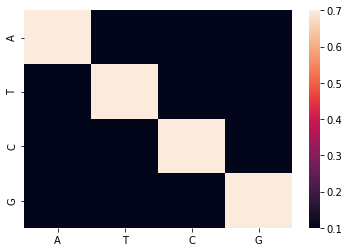

(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
(4,)
10.0
[[0.7 0.1 0.1 0.1]
 [0.1 0.7 0.1 0.1]
 [0.1 0.1 0.7 0.1]
 [0.1 0.1 0.1 0.7]]


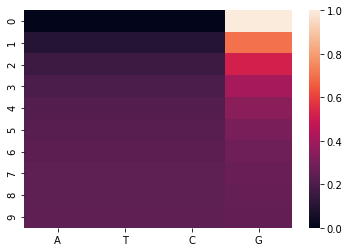

In [10]:
state0 = np.array([0,0,0,1])
r = .1

jk = r*np.ones((4,4))
np.fill_diagonal(jk,0)
for i in range(jk.shape[0]):
    jk[i,i] = 1-np.sum(jk[i,:])

sns.heatmap(jk , xticklabels= mapping.keys( ), yticklabels= mapping.keys( ))
plt.show()
probas = []
for i in range(10):
    probas.append(state0)
    print(state0.shape)
    state0 = np.matmul(state0,jk)
sns.heatmap(np.vstack(probas),xticklabels= mapping.keys( ))
print(np.sum(np.vstack(probas)))

print(jk)

In [5]:
print(jk)
jump_mat = copy.deepcopy(jk)

#normalize rows
for i in range(jump_mat.shape[0]):
    if np.sum(jump_mat[i,:]) > 0:
        jump_mat[i,:]/= np.sum(jump_mat[i,:])

        
#normalize rows
for i in range(jump_mat.shape[0]):
    if np.sum(jump_mat[i,:]) > 0:
        jump_mat[i,:]/= np.sum(jump_mat[i,:])
        
print(jump_mat)

Qmat = jump_mat
np.fill_diagonal(Qmat,0)
for i in range(Qmat.shape[0]):
    if np.sum(Qmat[i,:])> 0:
        Qmat[i,i] = -np.sum(Qmat[i,:])
print('qmat',Qmat)

#sum up the base frequencies * Mu of that base


def Pt( Qmat ,t ):
    rate = .1
    D = np.zeros(Qmat.shape)
    np.fill_diagonal(D , np.exp(-rate*t) )
    
    return  np.ones(Qmat.shape)*1/4 - np.multiply( Qmat, np.exp(-t * rate ) )



w, v = LA.eig(Qmat)
v_inv = LA.inv(v) 


print('Pmat',Pt(Qmat,.000005))


[[0.7 0.1 0.1 0.1]
 [0.1 0.7 0.1 0.1]
 [0.1 0.1 0.7 0.1]
 [0.1 0.1 0.1 0.7]]
[[0.7 0.1 0.1 0.1]
 [0.1 0.7 0.1 0.1]
 [0.1 0.1 0.7 0.1]
 [0.1 0.1 0.1 0.7]]
qmat [[-0.3  0.1  0.1  0.1]
 [ 0.1 -0.3  0.1  0.1]
 [ 0.1  0.1 -0.3  0.1]
 [ 0.1  0.1  0.1 -0.3]]


NameError: name 'LA' is not defined

In [ ]:
state0 = np.array([0,0,0,1])
probas = []
dt=.10
print(v.shape)
D = np.zeros((v.shape))

np.fill_diagonal(D,w)

print(w)

probas.append(state0)
print(Pdt)
t= 0
for i in range(20):
    t+=dt
    probas.append( np.matmul( state0 ,  Pt( Qmat ,dt )  ) )

sns.heatmap(np.vstack(probas),xticklabels= mapping.keys( ))

In [ ]:
#align Ids

In [23]:
tree = dendropy.Tree.get(
    path=treefile,
    schema='newick')
treelen = tree.length()
print(treelen)
treenodes = len(tree.nodes())
print(treenodes)
print(align_array.shape)

49.026590402199986
282
(142, 3783)


./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_TC_coevmat.pkl
67881.0
./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_CG_coevmat.pkl
24649.0
./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_GA_coevmat.pkl
61710.0
./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_CA_coevmat.pkl
22733.0
./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_CT_coevmat.pkl
65201.0
./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_GC_coevmat.pkl
39665.0
./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_AT_coevmat.pkl
31501.0
./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_GT_coevmat.pkl
42622.0
./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstra

<AxesSubplot:>

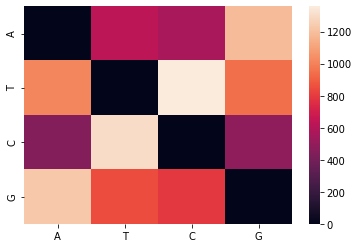

In [25]:

transitionmat = np.zeros( (4,4))

#the number of actual events recorded should be number of transitions recorded / jk_iterations
coevmats_raw = {}

for outsankof in eventmats:
    print(outsankof)
    transition_type = outsankof.replace('./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_'  , '')
    transition_type = transition_type.replace( '_coevmat.pkl' , '')
    transition_type = transition_type.replace("'" , '')
    
    with open( outsankof , 'rb') as matin:
        coevmat = pickle.loads(matin.read())[1]
    
    print(np.sum(coevmat))
    row = mapping[ transition_type[0] ]
    col = mapping[ transition_type[1] ]
    transitionmat[row,col] = coevmat.sum()
    transitionmat[row,col]/= jk_iterations
    coevmat/=jk_iterations
    coevmats_raw[transition_type] = coevmat.todense()

sns.heatmap(transitionmat, xticklabels= mapping.keys( ) , yticklabels=mapping.keys())  

[[0.97896013 0.00530465 0.00425361 0.00861246]
 [0.00476327 0.97827513 0.00997095 0.00431058]
 [0.006454   0.01008858 0.97903038 0.00612899]
 [0.00982261 0.00633164 0.00674506 0.98094797]]


<AxesSubplot:>

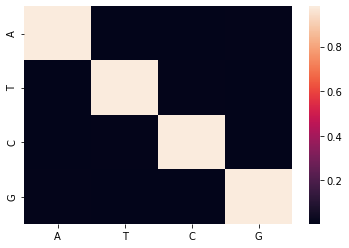

In [12]:
transitionmat/=align_array.shape[1]*treelen
for i in range(transitionmat.shape[1]):
    transitionmat[i,i] = 1- np.sum(transitionmat[:,i])
    #markov transition mat
print(transitionmat)
sns.heatmap(transitionmat, xticklabels= mapping.keys( ) , yticklabels=mapping.keys())

In [13]:
#the state changes over all branches 
#eig(transition_mat) to get p(t) = c ( exp(eig) ) c^-1
from numpy import linalg as LA
w, v = LA.eig(transitionmat)

print(w)
print(v)

[1.         0.97780532 0.97074237 0.96866591]
[[ 0.45113573  0.50131898 -0.74365535  0.26593479]
 [ 0.45071907 -0.56881839  0.04149003 -0.69896535]
 [ 0.52140839 -0.42605831  0.03585479  0.63302962]
 [ 0.56697633  0.49355773  0.66631053 -0.19999907]]


In [14]:
v_inv = LA.inv(v)
print(v_inv)

[[ 0.50245209  0.50245209  0.50245209  0.50245209]
 [ 0.43591288 -0.48812838 -0.54944484  0.54647438]
 [-0.77345026 -0.28398019  0.21473557  0.64369779]
 [-0.0766576  -0.72630383  0.783885   -0.08251182]]


In [15]:
#eigenval  mat with time = 1
Q = np.array([ [ np.exp( w[i] ) if i==j else 0 for j in range(transitionmat.shape[1]) ] for i in range( transitionmat.shape[1])] ) 
print( Q )
#p(t) = v * Q^t * v_inv

[[2.71828183 0.         0.         0.        ]
 [0.         2.65861503 0.         0.        ]
 [0.         0.         2.63990352 0.        ]
 [0.         0.         0.         2.63442754]]


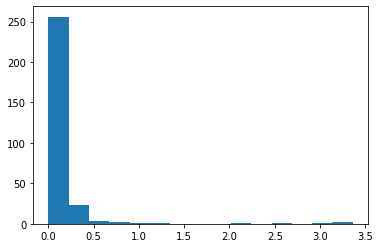

[2.18350000e-06 2.24120400e-01 4.48238617e-01 6.72356834e-01
 8.96475051e-01 1.12059327e+00 1.34471148e+00 1.56882970e+00
 1.79294792e+00 2.01706613e+00 2.24118435e+00 2.46530257e+00
 2.68942079e+00 2.91353900e+00 3.13765722e+00 3.36177544e+00]
[256  23   3   2   1   1   0   0   0   1   0   1   0   1   2]


In [16]:
#get edge length distribution
edgelengths = []
for node in tree.nodes():
    if node.edge_length:
        edgelengths.append(node.edge_length)
plt.hist(edgelengths,15)
plt.show()
time_counts,time_bins = np.histogram( edgelengths , bins= 15 ) 

print(time_bins)
print(time_counts)

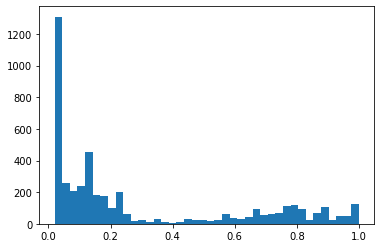

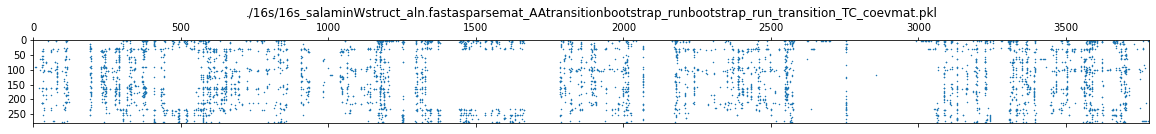

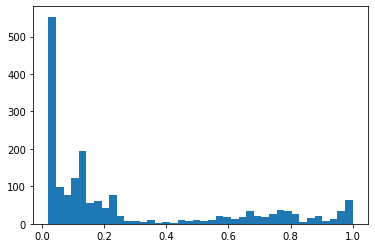

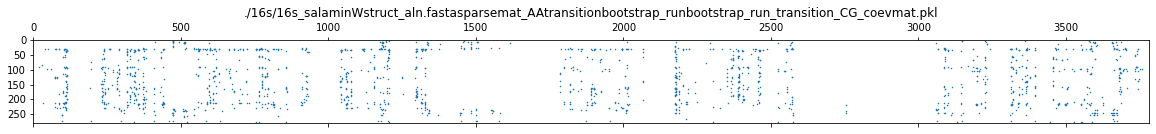

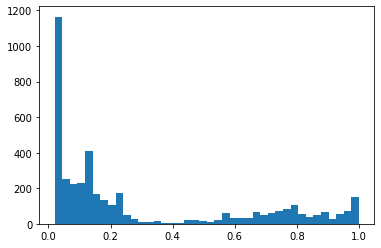

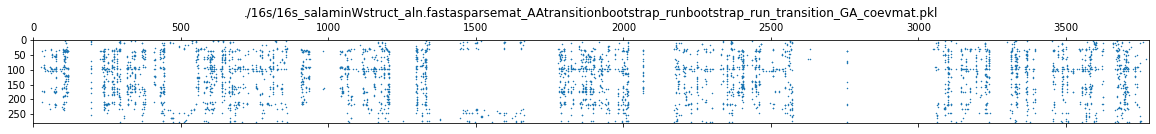

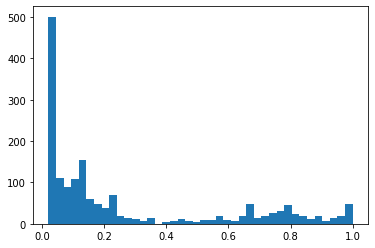

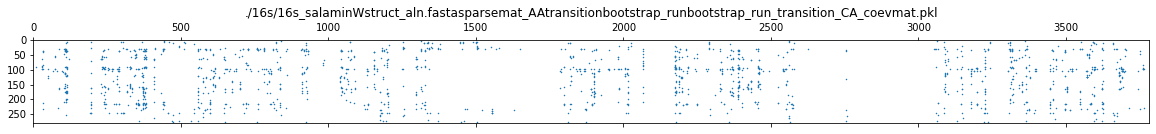

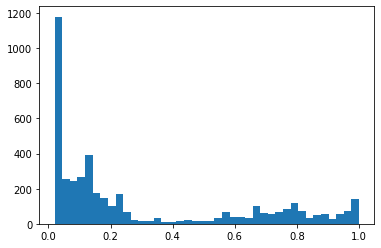

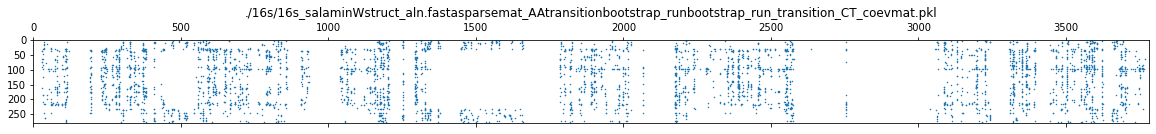

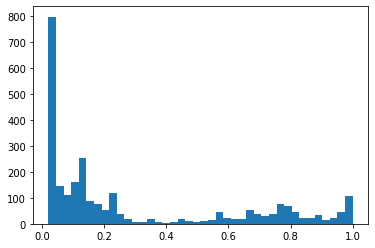

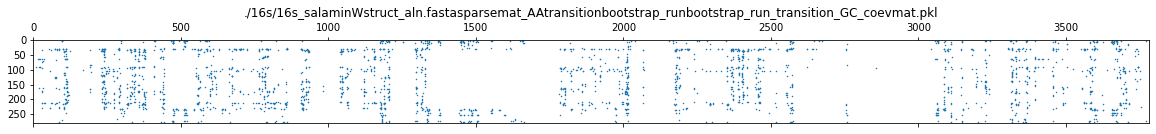

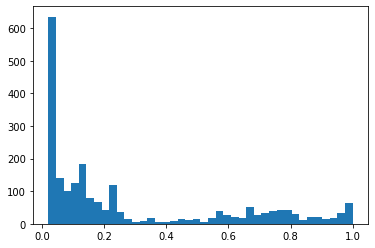

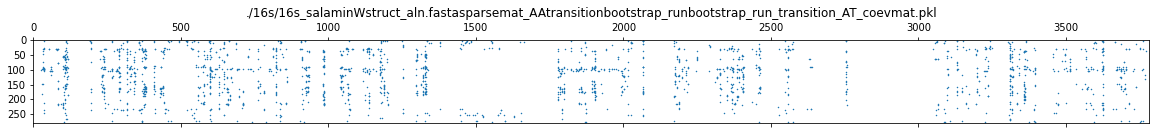

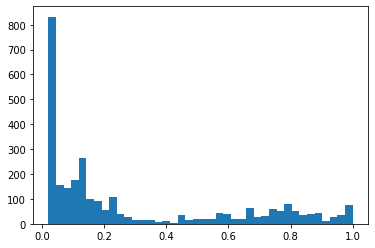

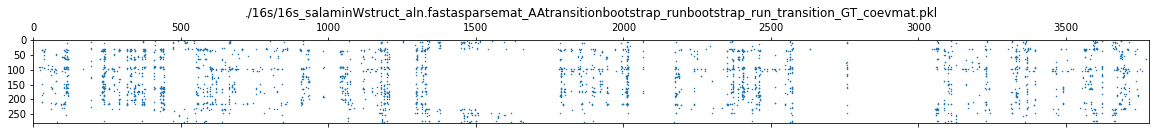

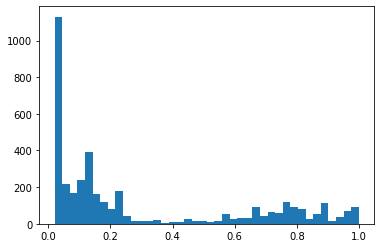

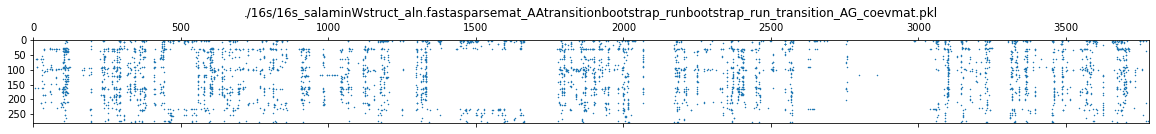

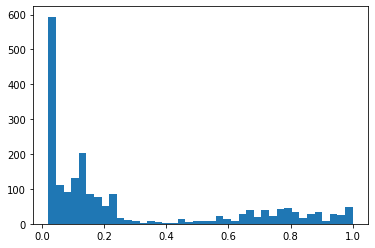

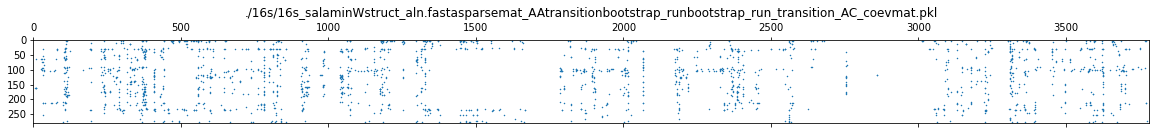

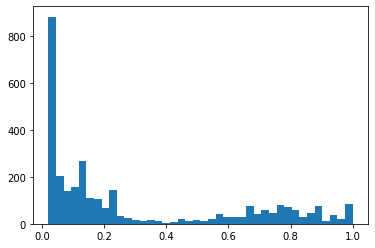

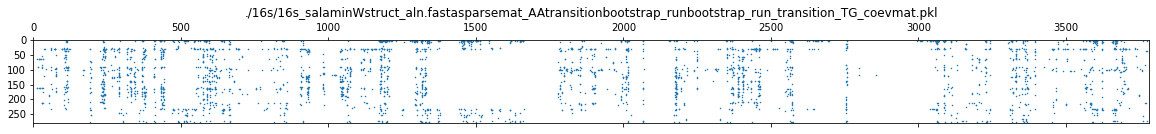

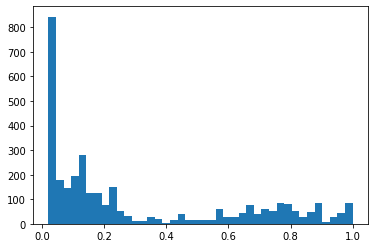

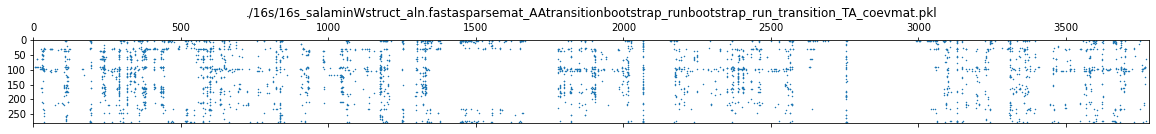

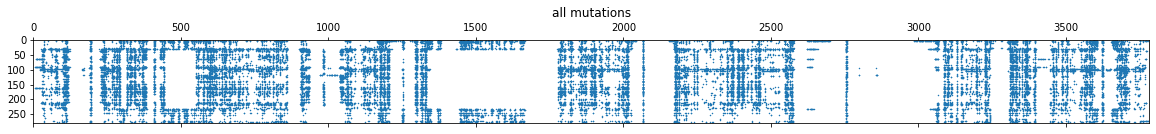

In [26]:
tensor = []
coevmats_raw = {}
thresh_mats = .2
for i,outsankof in enumerate(eventmats):
    with open( outsankof , 'rb') as matin:
        coevmat = pickle.loads(matin.read())[1]
    coevmat = coevmat.todense()
    coevmat/= jk_iterations 
    if i == 0:
        globalmat_thresh = coevmat
        globalmat_thresh[thresh_mats > globalmat_thresh ] = 0        
    else:
        coevmat[thresh_mats > coevmat] = 0
        globalmat_thresh+= coevmat


for i,outsankof in enumerate(eventmats):
    with open( outsankof , 'rb') as matin:
        coevmat = pickle.loads(matin.read())[1]
    tensor.append( coevmat )
    coevmat = coevmat.todense()
    coevmat/= jk_iterations 
    if i == 0:
        globalmat = coevmat
    else:
        globalmat+= coevmat
    
    transition_type = outsankof.replace('./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_'  , '')
    transition_type = transition_type.replace( '_coevmat.pkl' , '')
    transition_type = transition_type.replace("'" , '')
    coevmats_raw[transition_type] = coevmat
    
    
    plt.hist( coevmat[coevmat>0].flat , bins = 40 )
    plt.show()
    plt.figure(figsize=(20,10))
    plt.spy(coevmat, markersize= .5)
    plt.title(outsankof)
    plt.show()
plt.figure(figsize=(20,10))
plt.title('all mutations')
plt.spy(globalmat,markersize= .5)
plt.show()

bigstack = np.vstack(tensor)

In [27]:
#use tree to blur eventmat
from Bio import AlignIO
tree = dendropy.Tree.get(
    path=treefile,
    schema='newick')
col = 525
aln_col = align_array[:,col]
def clipID(ID):
    return ID.replace('/',' ')

msa = AlignIO.read(alnfile , format = 'fasta')    
IDs = {i:clipID(rec.id) for i,rec in enumerate(msa)}
#IDs = {i:rec.id for i,rec in enumerate(msa)}
IDindex = dict(zip( IDs.values() , IDs.keys() ) )
matsize = len(tree.nodes())
#add chars to leaves
for i,l in enumerate(tree.leaf_nodes()):
    if l.taxon.label in IDindex:
        l.taxon.label += ' '+ aln_col[IDindex[l.taxon.label]].decode()

#add events
for i,n in enumerate(tree.nodes()):
    if globalmat[i,col]>0:
        n.label = str( globalmat[i,col] )
    else:
        n.label = ''
#vis w event proba 
tree.print_plot( show_internal_node_labels = True , width = 100)

/------------------------------------------------------------------------------------- pr.Sar.neu T 
|                                                                                                   
|                                                                               /----- fu.Neu.cra T 
|                                                                            /--|                   
|                                                                            |  |  /-- fu.Asp.tam T 
|                                                                            |  \--|                
|                                                                         /--|     \-- fu.Asp.nid T 
|                                                                         |  |                      
|                                                                         |  |     /-- fu.Sac.cer T 
|                                                                      /--|  \-----|       

282
nodes


/home/cactuskid/miniconda3/envs/tfnew/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


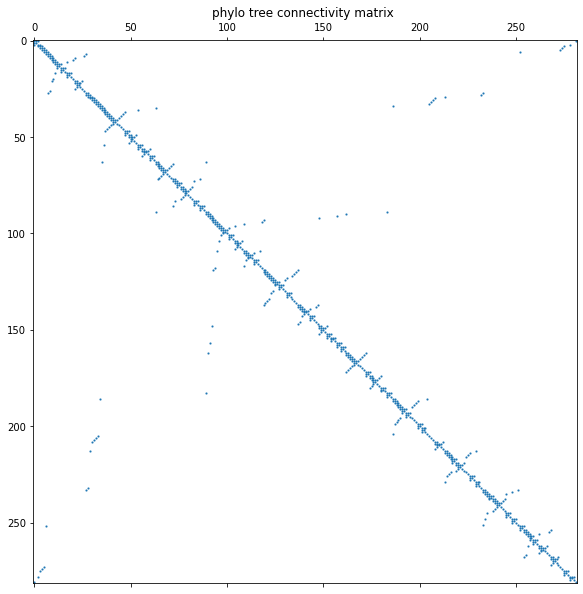

In [28]:
for i,n in enumerate(tree.nodes()):
    n.matrow = i
    n.symbols = None
    n.scores = None
    n.event = None
    n.char = None

matsize = len(tree.nodes())
print(matsize)
print('nodes')

#blur w connectivity mat
blurfactor =  .25
bluriter = 2

connectmat = scipy.sparse.csc_matrix((len(tree.nodes()), len(tree.nodes() ) ) )
index = np.array([ [n.matrow, c.matrow ] for n in tree.nodes() for c in n.child_nodes()])
lengths = np.array([ c.edge_length for n in tree.nodes() for c in n.child_nodes()])
total_len = np.sum(lengths)
#fill diagonal
#index = np.vstack( [index , np.array([ [n.matrow, n.matrow ] for n in tree.nodes() ]) ] )

connectmat[index[:,0],index[:,1]] = 1
connectmat[index[:,1],index[:,0]] = 1
connectmat = connectmat.todense()
np.fill_diagonal(connectmat , 1)

plt.figure( figsize=(10,10))
plt.title( 'phylo tree connectivity matrix ' )
plt.spy(connectmat, markersize= 1)
plt.show()

67881.0
135762.0
263840.875
263840.875


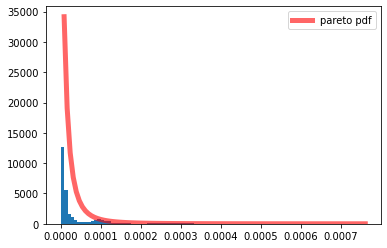

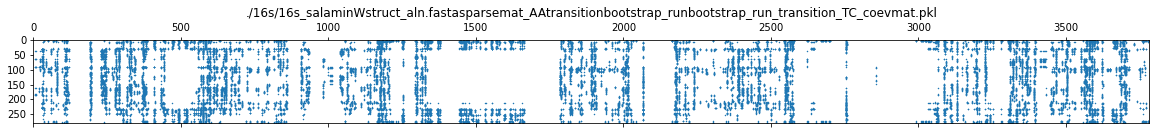

24649.0
49298.0
95896.875
95896.875


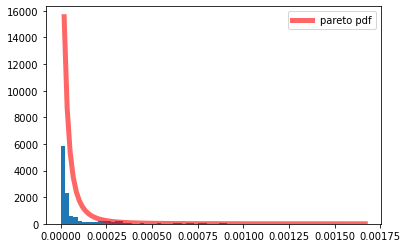

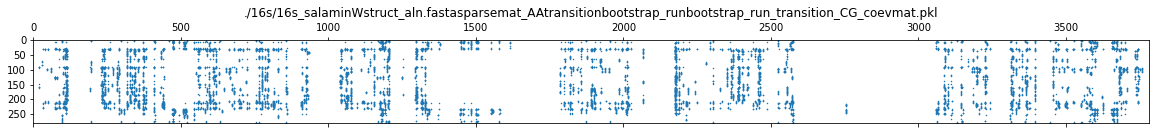

61710.0
123420.0
239431.75
239431.75


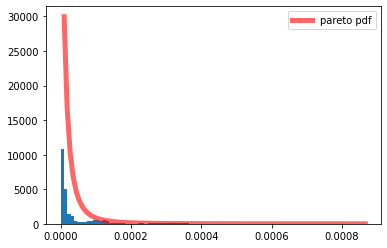

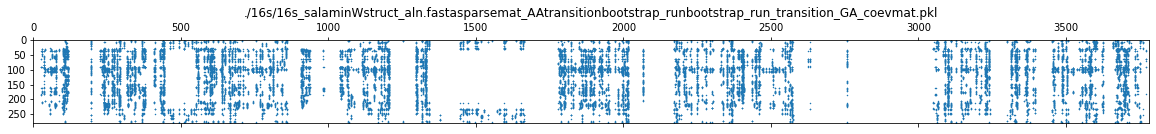

22733.0
45466.0
88184.375
88184.375


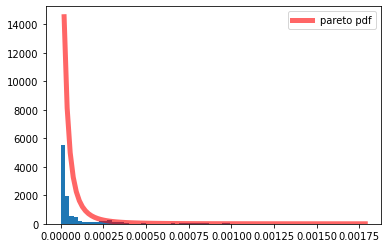

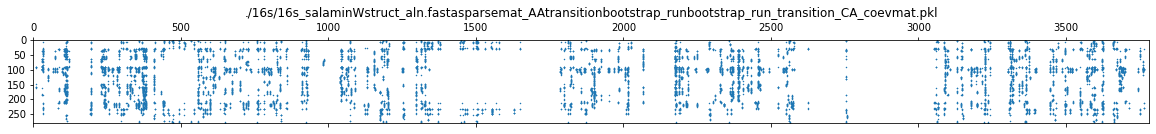

65201.0
130402.0
252745.125
252745.125


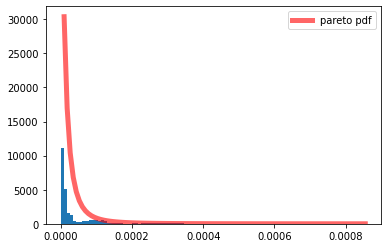

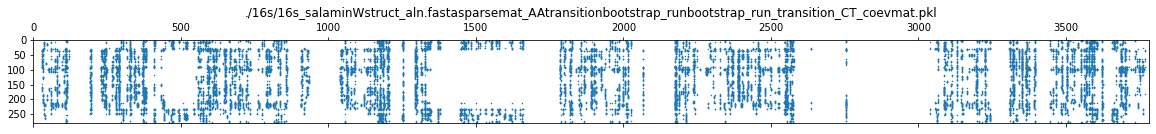

39665.0
79330.0
154617.0
154617.0


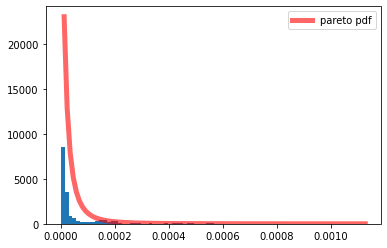

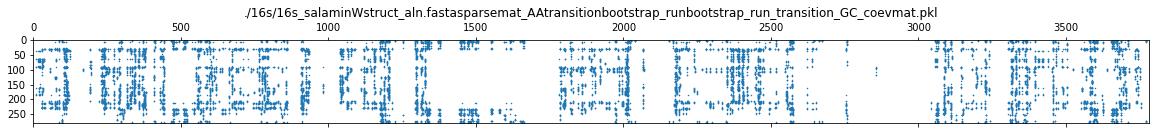

31501.0
63002.0
122133.375
122133.375


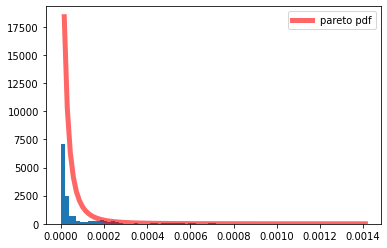

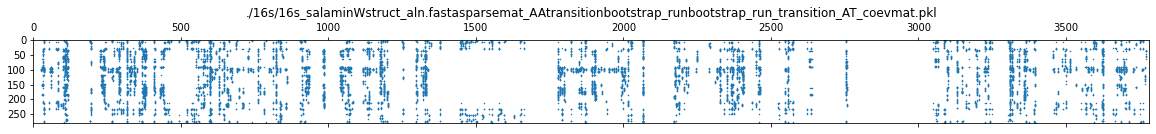

42622.0
85244.0
165412.875
165412.875


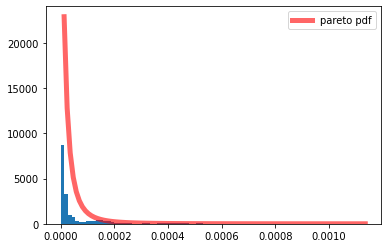

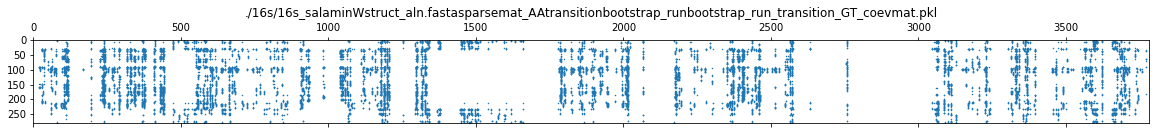

59493.0
118986.0
231321.125
231321.125


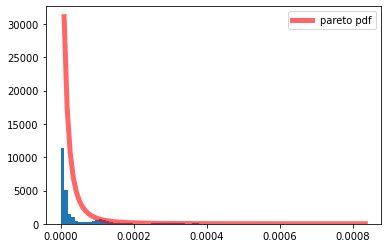

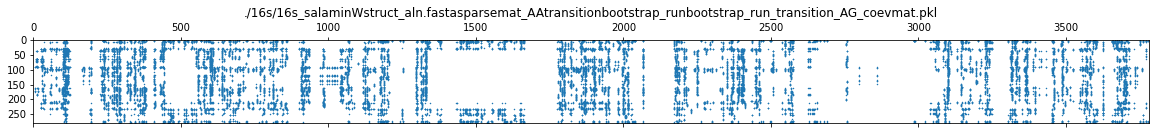

28185.0
56370.0
109686.375
109686.375


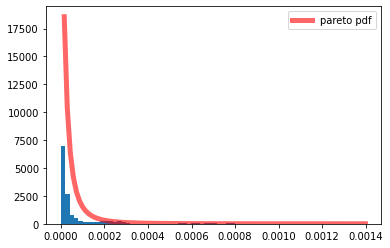

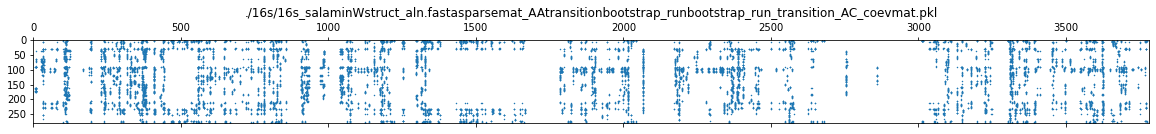

47396.0
94792.0
184715.25
184715.25


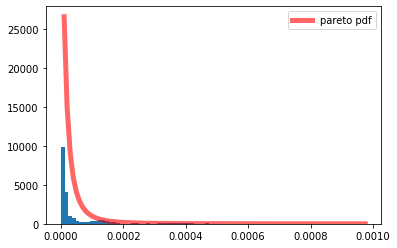

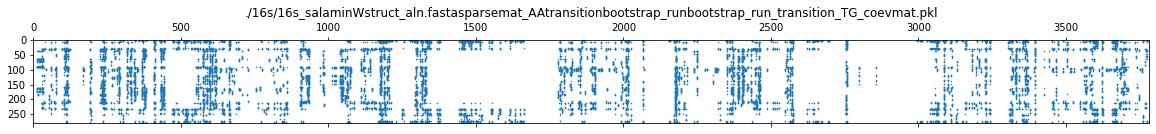

50748.0
101496.0
197330.0
197330.0


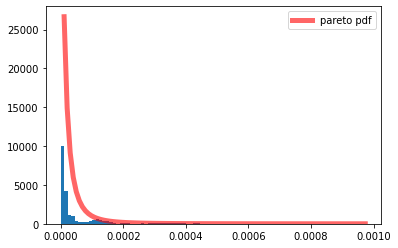

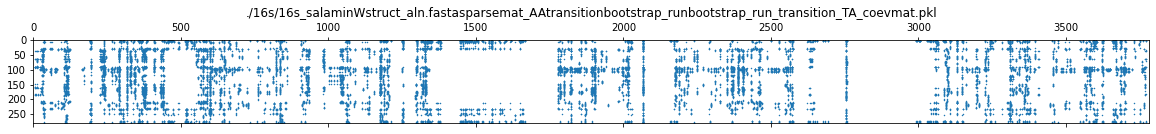

calculating pareto for total event scores


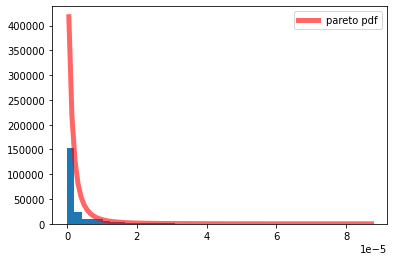

In [29]:
#blur the eventmats and find distribution of blurred jackknife

#use rbm ising model to capture features

vectors = []

#include the scaling factor and distribution params
jkparetto_transitions_vs_timebins = {}
jkparetto ={}
coevmats = {}

#get pareto distribution of jackknife by event type and time
for i,outsankof in enumerate(eventmats):
    with open( outsankof , 'rb') as matin:
        coevmat = pickle.loads(matin.read())[1]
    
    
 
    coevmat = coevmat.todense()
    for k in range( bluriter):
        print(np.sum(coevmat))
        coevmat += np.dot(blurfactor*connectmat, coevmat )
    print(np.sum(coevmat))

    if i == 0:
        globalmat_blur = coevmat
    else:
        globalmat_blur += coevmat
    
    transition_type = outsankof.replace('./16s/16s_wstruct.aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_'  , '')
    transition_type = transition_type.replace( '_coevmat.pkl' , '')
    transition_type = transition_type.replace("'" , '')
    coevmats[transition_type] = coevmat
    print(np.sum(coevmat))
    '''coevmats[transition_type]=coevmat
    #generate a vector for each time bin
    previous_time = 0
    for t,max_time in enumerate(list(time_bins)):
        if max_time not in jkparetto_transitions_vs_timebins:
            jkparetto_transitions_vs_timebins[max_time] = {}
        #print('max time : ', max_time)
        node_inidices = [  node.matrow  for node in tree.nodes() if  node.edge_length and node.edge_length > previous_time and  node.edge_length >= max_time  ]
        #print('n branches : ', len(node_inidices))
        submat = coevmat[node_inidices , : ]
        previous_time = max_time
        submat = submat[submat>0].flatten()
        sum_events = np.sum(submat)
        submat /= sum_events
        
        #print('n events : ' , submat.shape)
        
        df, loc, scale = scipy.stats.genpareto.fit( submat.flat )
        
        #keep paretto parameters for this time bin and transition type
        jkparetto_transitions_vs_timebins[max_time][transition_type] = {'max_time':max_time, 'scaling': sum_events, 'df': df, 'loc':loc, 'scale':scale }
        x = np.linspace(scipy.stats.genpareto.ppf(.3, df, loc=loc , scale=scale ),
                scipy.stats.genpareto.ppf(.99, df  , loc=loc , scale=scale ), 100)
        if t < 3:
            plt.plot(x, scipy.stats.genpareto.pdf(x, df ,  loc=loc , scale=scale), '-', lw=2, alpha=0.6, label='pareto pdf ' + str(max_time))'''
    #plt.legend()
    #plt.show()
    vector =  coevmat[coevmat>0].flatten()
    vectors.append(vector)
    
    #vector =  coevmat.flatten()
    vector /= np.sum(vector)
    plt.hist( vector.flat , bins = 40 )
    df, loc, scale = scipy.stats.genpareto.fit( vector.flat )
    x = np.linspace(scipy.stats.genpareto.ppf(.4, df, loc=loc , scale=scale ),
                scipy.stats.genpareto.ppf(.999, df  , loc=loc , scale=scale ), 100)
    plt.plot(x, scipy.stats.genpareto.pdf(x, df ,  loc=loc , scale=scale), 'r-', lw=5, alpha=0.6, label='pareto pdf')
    plt.legend()
    
    plt.figure(figsize=(20,10))
    plt.spy(coevmat, markersize= .5)
    plt.title(outsankof)
    plt.show()


print('calculating pareto for total event scores')
vectors = np.hstack(vectors)
sum_events =  np.sum(vectors)
vectors /= np.sum(vectors)
plt.hist( vectors.flat , bins = 40 )

df, loc, scale = scipy.stats.genpareto.fit( vectors.flat )
x = np.linspace(scipy.stats.genpareto.ppf(.25, df, loc=loc , scale=scale ),
                scipy.stats.genpareto.ppf(.999, df  , loc=loc , scale=scale ), 100)

plt.plot(x, scipy.stats.genpareto.pdf(x, df ,  loc=loc , scale=scale), 'r-', lw=5, alpha=0.6, label='pareto pdf')
plt.legend()
plt.show()

jkpareto = { 'scaling': sum_events, 'df': df, 'loc':loc, 'scale':scale }

In [30]:
#use tree to blur eventmat
from Bio import AlignIO
tree = dendropy.Tree.get(
    path=treefile,
    schema='newick')
col = 521
aln_col = align_array[:,col]
def clipID(ID):
    return ID.replace('/',' ')

msa = AlignIO.read(alnfile , format = 'fasta')    
IDs = {i:clipID(rec.id) for i,rec in enumerate(msa)}
#IDs = {i:rec.id for i,rec in enumerate(msa)}
IDindex = dict(zip( IDs.values() , IDs.keys() ) )
matsize = len(tree.nodes())
#add chars to leaves
for i,l in enumerate(tree.leaf_nodes()):
    if l.taxon.label in IDindex:
        l.taxon.label += ' '+ aln_col[IDindex[l.taxon.label]].decode()

#add events
for mat in coevmats:
    print(mat)
    for i,n in enumerate( tree.nodes() ):
        if coevmats[mat][i,col] > 0:
            n.label = str( coevmats[mat][i,col] )
        else:
            n.label = ''
    #vis w event proba 
    tree.print_plot( show_internal_node_labels = True , width = 100)

./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_TC
/------------------------------------------------------------------------------------- pr.Sar.neu C 
|                                                                                                   
|                                                                               /----- fu.Neu.cra C 
|                                                                            /--|                   
|                                                                            |  |  /-- fu.Asp.tam T 
|                                                                            |  \--|                
|                                                                         /--|     \-- fu.Asp.nid T 
|                                                                         |  |                      
|                                                                         |  |     /-- fu.Sac.c

In [31]:
from functools import partial

#define the jack knife / blur score proba functions

def discretize(t, timebins):
    #return a discvretized time to call a bin of the hist of jackknife score
    prevtime = 0
    for time in timebins:
        if t > prevtime and t<= time:
            return time
    else:
        return max(timebins)

def p_jacknife(jacknife , pdf_jk):
    #given a jacknife score, what is its probability over all scores
    jacknife /=pdf_jk['scaling']
    
    return scipy.stats.genpareto.cdf(jacknife , pdf_jk['df']  , loc=pdf_jk['loc'] , scale= pdf_jk['scale'] )

def p_jacknife_given_s1s2t( jacknife, s1,s2, t , jk_pdfs  ):
    #given that a transition was detected over t, what is the probability of this jackknife/blur score
    #derive a distribution of jack_knife/blur score for each transition type and time
    #get the pvalue of a jackknife score sampling the normalized 2d hist ( distribution of scores over time bins )
    timebin = discretize(t)
    jacknife/=jk_pdfs[timebin][s1+s2]['scaling']
    return scipy.stats.genpareto.cdf(jacknife , jk_pdfs[timebin][s1+s2]['df']  , loc=jk_pdfs[timebin][s1+s2]['loc'] , scale= jk_pdfs[timebin][s1+s2]['scale'] )

p_jacknife = partial(p_jacknife,  pdf_jk = jkpareto  )
p_jacknife_given_s1s2t = partial(p_jacknife_given_s1s2t,  jk_pdfs = jkparetto_transitions_vs_timebins )
discretize = partial(discretize , timebins = list(time_bins)  )

NameError: name 'time_bins' is not defined

In [50]:
def p( t , v, v_inv, w):
    #define transition probability given two states and time elapsed using mutation rates for markov process
    Q = np.array([ [ np.exp( w[i]*t ) if i==j else 0 for j in range(w.shape[0]) ] for i in range( w.shape[0])] ) 
    probas_over_t = v * Q * v_inv
    return probas_over_t

def p_dual( t , v, v_inv, w):
    #define transition probability given two states and time elapsed using mutation rates for markov process
    Q = np.array([ [ np.exp( w[i]*t ) if i==j else 0 for j in range(w.shape[0]) ] for i in range( w.shape[0] ) ] )
    probas_over_t = v*Q*v_inv
    return probas_over_t

def bayes_jk( s1,s2, t , jacknife ):
    #give the score of this transition, what is the proba it occured here
    #depends on blurred jackknife distribution and markov transition proba
    #sum jacknife prob, transition mat colum and p jackknife all = 1
    
    conditioning = p_jacknife_given_s1s2t(jacknife, s1,s2, t ) / p_jacknife(jacknife)
    return conditioning


In [51]:
######important 
mapping = {'A':0 , 'T':1 , 'C':2 ,'G':3 }
transitions = [ char1+char2  for char1 in mapping.keys() for char2 in mapping.keys()]
transitionmap = { t:i for i,t in enumerate(transitions) }
print(transitionmap)
print(mapping)

{'AA': 0, 'AT': 1, 'AC': 2, 'AG': 3, 'TA': 4, 'TT': 5, 'TC': 6, 'TG': 7, 'CA': 8, 'CT': 9, 'CC': 10, 'CG': 11, 'GA': 12, 'GT': 13, 'GC': 14, 'GG': 15}
{'A': 0, 'T': 1, 'C': 2, 'G': 3}


In [52]:
#use one column at a time to derive transition mat
def test():
    print(np.sum(coevmats['TC'][:,119]))

def singlemat_Pdt( coevmats , column , verbose = True ):
    transitionmat = np.zeros( (len(mapping),len(mapping)))
    for c1 in mapping:
        for c2 in mapping:
        #print(coevmats[transition][:,col])
            row = mapping[ c1 ]
            col = mapping[ c2 ]
            if c1+c2 in coevmats:
                transitionmat[row,col] = np.sum(coevmats[c1+c2][:,column])
        #transitionmat[row,col]/= jk_iterations
    #columns must sum to 1
    jump_mat = copy.deepcopy(transitionmat)
    
    #normalize rows
    for i in range(jump_mat.shape[0]):
        if np.sum(jump_mat[i,:]) > 0:
            jump_mat[i,:]/= np.sum(jump_mat[i,:])
    if verbose == True:
        print(jump_mat)
    
    for i in range(transitionmat.shape[1]):
        transitionmat[i,i] = 1- np.sum(transitionmat[:,i])
    
    #solve for q mat
    Qmat = treelen*jump_mat
    Qmat += .00001
    
    
    for i in range(Qmat.shape[0]):
        if np.sum(Qmat[i,:])> 0:
            Qmat[i,i] = -np.sum(Qmat[i,:])
    
    print(Qmat)

    w, v = LA.eig(Qmat)
    v_inv = LA.inv(v)                   
    if verbose == True:
        return v,v_inv, w ,transitionmat , Q
    else:
        return v,v_inv, w 

#use two colums to derive the dual model
def doublemat_Pdt(coevmats ,  col1 , col2 , verbose = True ):
    #simultaneous change over dt = 0
    #changes over the same branch are registered as two sequential changes
    transitionmat = np.zeros( (len(transitionmap),len(transitionmap)))
    for i,transition1 in enumerate(transitionmap):
        for j,transition2 in enumerate(transitionmap):
            row = transitionmap[transition1]
            col =  transitionmap[transition2]

            #find events where only one changed over a branch
            #only change in col1
            if transition1 in coevmats and transition2 not in coevmats:
                #sum up events where sate doesnt change for column 2 starting a state t2[0]
                sumcol2 = np.sum( np.hstack([ coevmats[t][:,col2] for t in coevmats if t[0] == transition2[0] ]) , axis = 1)
                single_events = np.sum(coevmats[transition1][:,col1][sumcol2 == 0 ])
            #only change in col2
            elif transition2 in coevmats and transition1 not in coevmats:
                #find all instances where column1 started in state t1[0] didn't change
                sumcol1 = np.sum( np.hstack([ coevmats[t][:,col1] for t in coevmats if t[0] == transition1[0] ]) , axis = 1)
                single_events = np.sum(coevmats[transition2][:,col2][sumcol1 == 0 ])
            else:
                single_events = 0
            if verbose == True:
                #print(transition1, transition2, row, col)
                #print(single_events)
                pass
            transitionmat[row,col] = single_events
                #sum of events where columns in both coevmats are non-zero
    #divide by treelen
    transitionmat/= treelen
    #fill diagonal
    for i in range(transitionmat.shape[1]):
        transitionmat[i,i] = 1 - np.sum(transitionmat[i,:])
    
    #solve for q mat
    Qmat = treelen*transitionmat
    #add a little epsilon
    Qmat += .00001
    np.fill_diagonal(Qmat,0)
    for i in range(Qmat.shape[0]):
        Qmat[i,i] = -np.sum(Qmat[i,:])
    print(Qmat)
    w, v = LA.eig(Qmat)
    v_inv = LA.inv(v)  
    if verbose == True:
        return v,v_inv, w ,transitionmat
    else:
        return v,v_inv, w 


[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]]
[[-4.43983553e+01  4.43983253e+01  1.00000000e-05  1.00000000e-05]
 [ 1.00000000e-05 -4.00000000e-05  1.00000000e-05  1.00000000e-05]
 [ 1.00000000e-05  1.00000000e-05 -4.00000000e-05  1.00000000e-05]
 [ 1.00000000e-05  4.43983253e+01  1.00000000e-05 -4.43983553e+01]]
[-4.43983653e+01 -1.00000000e-05 -4.43983653e+01 -5.00000000e-05]


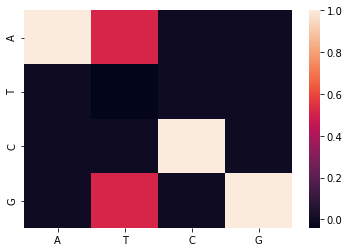

[[2.71828183 0.         0.         0.        ]
 [0.         2.65861503 0.         0.        ]
 [0.         0.         2.63990352 0.        ]
 [0.         0.         0.         2.63442754]]


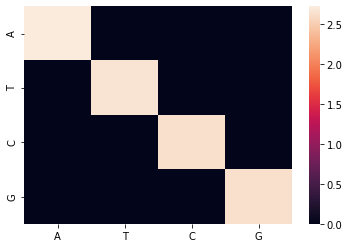

In [53]:
col = 119
#markov transition mat for 1 col
v, vinv , w , transitionmat , Qmat  = singlemat_Pdt( coevmats_raw , col , verbose = True)
print(w)

sns.heatmap(transitionmat, xticklabels= mapping.keys( ) , yticklabels=mapping.keys())
plt.show()
print(Qmat)
sns.heatmap(Qmat, xticklabels= mapping.keys( ) , yticklabels=mapping.keys())
plt.show()

<AxesSubplot:>

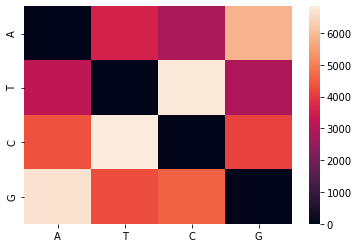

In [55]:
import seaborn as sns
mapping = {'A':0 , 'T':1 , 'C':2 ,'G':3 }
transitionmat = np.zeros( (4,4))
jk_iterations = 10
#the number of actual events recorded should be number of transitions recorded / jk_iterations
coevmats = {}

for outsankof in eventmats:
    transition_type = outsankof.replace('./16s/16s_wstruct.aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_'  , '')
    transition_type = transition_type.replace( '_coevmat.pkl' , '')
    transition_type = transition_type.replace("'" , '')
    
    with open( outsankof , 'rb') as matin:
        coevmat = pickle.loads(matin.read())[1]
    
    row = mapping[ transition_type[0] ]
    col = mapping[ transition_type[1] ]
    transitionmat[row,col] = coevmat.sum()
    transitionmat[row,col]/= jk_iterations
    coevmat/=jk_iterations
    coevmats[transition_type] = coevmat

sns.heatmap(transitionmat, xticklabels= mapping.keys( ) , yticklabels=mapping.keys())  

[[-2.40150e-01  1.00000e-05  8.00100e-02  1.00000e-05  1.00000e-05
   1.00000e-05  1.00000e-05  1.00000e-05  4.00100e-02  1.00000e-05
   1.00000e-05  1.00000e-05  1.00000e-05  1.20010e-01  1.00000e-05
   1.00000e-05]
 [ 5.20010e-01 -1.04015e+00  1.00000e-05  1.00000e-05  1.00000e-05
   5.20010e-01  1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05
   1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05
   1.00000e-05]
 [ 1.00000e-05  1.00000e-05 -1.50000e-04  1.00000e-05  1.00000e-05
   1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05
   1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05
   1.00000e-05]
 [ 1.00000e-05  1.00000e-05  1.00000e-05 -1.50000e-04  1.00000e-05
   1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05
   1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05
   1.00000e-05]
 [ 1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05 -1.50000e-04
   1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-05  1.00000e-0

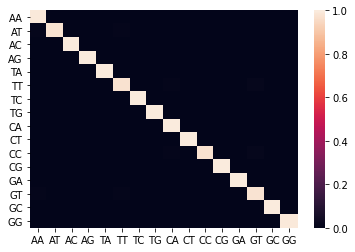

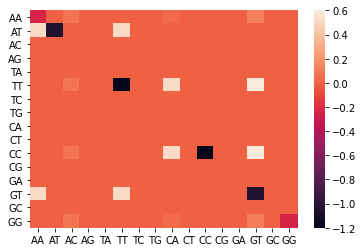

In [56]:
col1 = 119 
col2 = 120

#jump mat for t = 1
#markov transition mat for 2 cols
v, vinv , w , transitionmat = doublemat_Pdt(coevmats_raw ,  col1 , col2 )
sns.heatmap(transitionmat,  xticklabels=transitionmap.keys() , yticklabels=transitionmap.keys())

print(w)
print( np.sum(transitionmat, axis = 1))

print( np.sum(transitionmat, axis = 0))

plt.show()
Qmat = treelen*transitionmat
np.fill_diagonal(Qmat,0)
for i in range(Qmat.shape[0]):
    Qmat[i,i] = -np.sum(Qmat[i,:])
sns.heatmap(Qmat, xticklabels= transitionmap.keys( ) , yticklabels=transitionmap.keys())
plt.show()

In [57]:
print( align_array[:, col2])

[b'-' b'-' b'-' b'-' b'-' b'C' b'C' b'C' b'C' b'C' b'C' b'C' b'C' b'C'
 b'C' b'C' b'A' b'C' b'C' b'C' b'C' b'T' b'C' b'G' b'-' b'A' b'C' b'C'
 b'C' b'C' b'C' b'A' b'C' b'C' b'C' b'C' b'C' b'C' b'C' b'C' b'C' b'C'
 b'C' b'C' b'A' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-'
 b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-'
 b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-'
 b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-'
 b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-'
 b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-'
 b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-' b'-'
 b'-' b'-' b'-' b'-' b'-' b'-' b'-']


In [32]:
#find the probability of a transition tree
#proba over each branch of the transition or no change for all internal states
#use priors derived from jackknife and blur and sankoff do not explore all possibilities

def get_levels_p(node , coevmats , P , col , verbose = True):
    #using the felstein pruning algo calculate the proba only the relevant tree levels
    #go from leaves up
    if node.L is None:
        for child in node.child_nodes():
            if child.L is None:
                get_levels_p(child , coevmats,P,col )
        v,v_inv, w = P
        #calculate the conditional proba as a function of all states possible in each child node and parent
        node.L={}
        for s in mapping:
            node.L[s]=1
        
        for child in node.child_nodes():
            L={}
            for s in mapping:
                L[s]=0
            #find transition probas for branch len
            Pmat = p( child.edge_length, v, v_inv, w)
            
            for s1 in mapping:
                #get the max likelihood here for every state
                for s2 in mapping:
                    if s1+s2 in coevmats:
                        if coevmats[s1+s2][child.matrow,col] > 0 :
                            #there may have been a change here.
                            L[s1] += Pmat[mapping[s1],mapping[s2]] * bayes_jk( s1,s2, child.edge_length , coevmats[s1+s2][child.matrow,col] ) * child.L[s2]
                            print( bayes_jk( s1,s2, child.edge_length , coevmats[s1+s2][child.matrow,col] ))
                    else:
                        #no change
                        if Pmat[mapping[s1],mapping[s2]] > 0:
                            L[s1] += Pmat[mapping[s1],mapping[s2]] * child.L[s2]
                            
                        else:
                            L[s1] += child.L[s2] * 10**-6 
        #could be an error here due to alnchar:
            
            for s in mapping:
                node.L[s] *= L[s]
            
        if sum(node.L.values()) ==0:
            print(Pmat)
            for child in node.child_nodes():
                print(child.taxon)
                print(child.L)


        
        node.Ltotal = sum(node.L.values())
        if verbose == True:
            print( 'L', L)
        if verbose == True:
            print(node.L)

def get_levels_p_dual(node , coevmats , P , col1  , col2 ):
    #using the felstein pruning algo calculate the proba only the relevant tree levels
    #go from leaves up
    if node.L1 is None:
        for child in node.child_nodes():
            if child.L1 is None:
                get_levels_p_dual(node , coevmats , P , col1  , col2 )
        v,v_inv, w = P
        #calculate the conditional proba as a function of all states possible in each child node and parent        
        for child in node.child_nodes():
            if child.L is None:
                get_levels_p(child , coevmats,P,col )
        v,v_inv, w = P
        #calculate the conditional proba as a function of all states possible in each child node and parent
        node.L1={}
        node.L2={}
        for s in mapping:
            node.L[s]=1
        for child in node.child_nodes():
            L={}
            for s in mapping:
                L[s]=0
            
            #find transition probas for branch len
            Pmat = p( child.edge_length, v, v_inv, w)
            for t1 in transitionmap:
                #get the max likelihood here for every state
                for t2 in transitionmap:
                    s1_1 = t1[0]
                    s1_2 = t1[1]
                    s2_1 = t2[0]
                    s2_2 = t2[1]        
                    p = Pmat[transitionmap[t1],transitionmap[t2]] * child.L[s1_2]   
                    for t in [t1, t2]:
                        if t in coevmats:
                            p *= bayes_jk( s2_1,s2_2  , child.edge_length , coevmats[t2][child.matrow,col] )
                    L1[s1_1] += p
                
                node.L1[s1_1]*= L[s1_1]
                node.L2[s2_1]*= L[s2_1]

def L_single(tree , coevmats , P , col , alncol , verbose = True ):
    
    if verbose == True:
        print('calc p for single site')
    #assign the states to leaves
    for i,n in enumerate(tree.nodes()):
        n.matrow = i
        n.L = None
    for l in tree.leaf_nodes():
        #leaf in aln
        l.L= {}
        if l.taxon.label in IDindex:
            if alncol[IDindex[l.taxon.label]].decode() in mapping:
            #set state to aln char
                l.char = alncol[IDindex[l.taxon.label]].decode()
                for c in mapping:
                    l.L[c] = 0
                l.L[l.char] = 1
            elif alncol[IDindex[l.taxon.label]].decode() == '-':
                for c in mapping:
                    l.L[c] = 1/len(mapping)
            else:
                l.char = None
                for c in mapping:
                    l.L[c] = 1/len(mapping)
        else:
            l.char = None
            for c in mapping:
                l.L[c] = 1/len(mapping)
        
    L = get_levels_p(tree.seed_node, coevmats , P , col )

def L_double(tree , coevmats , P , col1, col2 , alncol1, alncol2 , verbose = True ):
    
    if verbose == True:
        print('calc p for single site')
        
    #assign the states to leaves
    for i,n in enumerate(tree.nodes()):
        n.matrow = i
        n.L = None
    for l in tree.leaf_nodes():
        #leaf in aln
        l.L1= {}
        l.L2= {}
        for alncol,L in [ (alncol1,l.L1) , (alncol2 , l.L2)]:
            if l.taxon.label in IDindex:
                if alncol[IDindex[l.taxon.label]].decode() in mapping:
                #set state to aln char
                    l.char = alncol[IDindex[l.taxon.label]].decode()
                    for c in mapping:
                        L[c] = 0
                    L[l.char] = 1
                elif alncol[IDindex[l.taxon.label]].decode() == '-':
                    for c in mapping:
                        L[c] = 1/len(mapping)
                else:
                    l.char = None
                    for c in mapping:
                        L[c] = 1/len(mapping)
            else:
                l.char = None
                for c in mapping:
                    L[c] = 1/len(mapping)
    L = get_levels_p_dual(tree.seed_node, coevmats , P , col )
    


In [33]:
print(IDindex)
print(align_array[IDindex['ar.The.pen 1-1511'],:])
print(align_array[IDindex['ar.The.pen 1-1511'],col1])

{'pr.Sar.neu': 0, 'fu.Neu.cra': 1, 'lo.Car.mob': 2, 'cy.Osc.aga': 3, 'mt.Sac.cer': 4, 'th.The.hyp': 5, 'lo.Lac.car': 6, 'lo.Sta.hom': 7, 'ep.Hel.pyl': 8, 'pr.Try.equ': 9, 'an.Lam.aep': 10, 'an.Str.int': 11, 'ep.Alv.pom': 12, 'sp.Tre.soc': 13, 'ga.Sal.typ': 14, 'mt.Tet.pyr': 15, 'pr.Sti.hel': 16, 'pl.Pan.gin': 17, 'al.Aci.cry': 18, 'pr.Pla.mal': 19, 'lo.Eub.lac': 20, 'ra.Dei.rad': 21, 'hi.Cor.oti': 22, 'ar.Met.ore': 23, 'de.Des.ter': 24, 'ga.Leg.lyt': 25, 'ar.Met.fer': 26, 'an.Bra.pli': 27, 'th.The.afr': 28, 'fu.Sch.pom': 29, 'lo.Bac.alc': 30, 'lo.Bac.sub': 31, 'be.Rho.pur': 32, 'hi.Noc.fla': 33, 'ch.Pin.thu': 34, 'an.Cae.ele': 35, 'fu.Lep.buc': 36, 'al.Rhi.fre': 37, 'de.Des.suc': 38, 'an.Ast.amu': 39, 'ar.The.chi': 40, 'ar.Sul.sol': 41, 'un.Mag.bav': 42, 'ch.Chl.mir': 43, 'fu.Asp.tam': 44, 'ep.Hel.tro': 45, 'pr.Tet.bor': 46, 'sp.Tre.suc': 47, 'fu.Lep.mic': 48, 'pr.Por.aca': 49, 'ar.Hal.val': 50, 'ch.Gly.max': 51, 'ra.Dei.mur': 52, 'ga.Hae.par': 53, 'sp.Bor.par': 54, 'mt.Mus.mus': 55, '

KeyError: 'ar.The.pen 1-1511'

In [34]:
tree = dendropy.Tree.get(
    path=treefile,
    schema='newick')
P  = singlemat_Pdt( coevmats_raw , col1 , verbose = False)
L_single(tree , coevmats , P , col1 , align_array[:, col1], verbose = True)

NameError: name 'singlemat_Pdt' is not defined

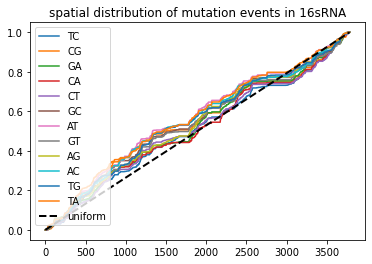

In [36]:
for outsankof in eventmats:

    transition_type = outsankof.replace('./16s/16s_salaminWstruct_aln.fastasparsemat_AAtransitionbootstrap_runbootstrap_run_transition_'  , '')
    transition_type = transition_type.replace( '_coevmat.pkl' , '')
    transition_type = transition_type.replace("'" , '')
    with open( outsankof , 'rb') as matin:
        coevmat = pickle.loads(matin.read())[1]
    coevmat = coevmat.todense()
    
    sumv = np.sum(coevmat , axis = 0)
    cdf = np.array( np.cumsum(sumv) / np.sum(sumv))
    plt.plot( cdf[0] , label= transition_type  )
    
cdf_uniform = np.cumsum(np.ones(len(cdf.ravel())) ) / np.sum(len(cdf.ravel()))

plt.plot(cdf_uniform, lw = 2 , ls = 'dashed' , c = 'black' , label= 'uniform')
plt.legend()
plt.title( 'spatial distribution of mutation events in 16sRNA' )
plt.show()

In [37]:
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import MiniBatchKMeans , DBSCAN ,SpectralClustering ,OPTICS
import sklearn

def return_clustering(codonmat, calc_isomap = True):
    
    if calc_isomap == True:
        isomap = Isomap( n_neighbors=25, n_components=int(codonmat.shape[0]/100), eigen_solver='auto', tol=0, 
           max_iter=None, path_method='auto', neighbors_algorithm='auto', n_jobs=-1 )
        codonmat_isomap = isomap.fit_transform( X=codonmat.T ).T

    #apb = MiniBatchKMeans(n_clusters=200, init='k-means++', max_iter=100, batch_size=200, verbose=1, compute_labels=True , random_state= 0   )
    #apb = DBSCAN( eps = .15 , metric='euclidean', metric_params=None, algorithm='auto', leaf_size=35, p=None, n_jobs=-1)
    apb = OPTICS(min_samples=5, metric='euclidean', p=2, metric_params=None, cluster_method='xi', eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', leaf_size=30, n_jobs=-1)
    cluster_labels_codon = apb.fit_predict(codonmat.T )
    return cluster_labels_codon


In [74]:
print(IDindex['ga.Esc.col'])
print(align_array[0])
#filter to columns without gaps
msa_row = list(align_array[0])
print(len(msa_row))
non_gap = np.where( align_array[0] != b'-')[0]
print(non_gap)

print(non_gap.shape)

86
[b'-' b'-' b'-' ... b'-' b'-' b'-']
3783
[  35   36   37 ... 3757 3758 3759]
(1803,)


In [42]:
from Bio.PDB import MMCIFParser
from Bio.PDB.mmcifio import MMCIFIO
parser = MMCIFParser()
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    structure = parser.get_structure("4v9d", "./16s/4v9d.cif")
io=MMCIFIO()
io.set_structure(structure)

In [43]:
#grab RNA

totalatoms = { c.id : [ r for r in c.get_residues() if r.get_resname() in {'A', 'U' , 'C' , 'G'} ] for c in structure.get_chains() }


In [44]:
#measure from phosphorus to phosphorus
distmats = {}
for chain in totalatoms:
    distmats[chain] = np.array( [[ a1['P'] - a2['P']  if (i<j and 'P' in a1 and 'P' in a2) else 0 for i,a1 in enumerate(totalatoms[chain])] for j,a2 in enumerate(totalatoms[chain]) ] )


In [45]:

for chain in distmats:
    distmats[chain] += distmats[chain].T


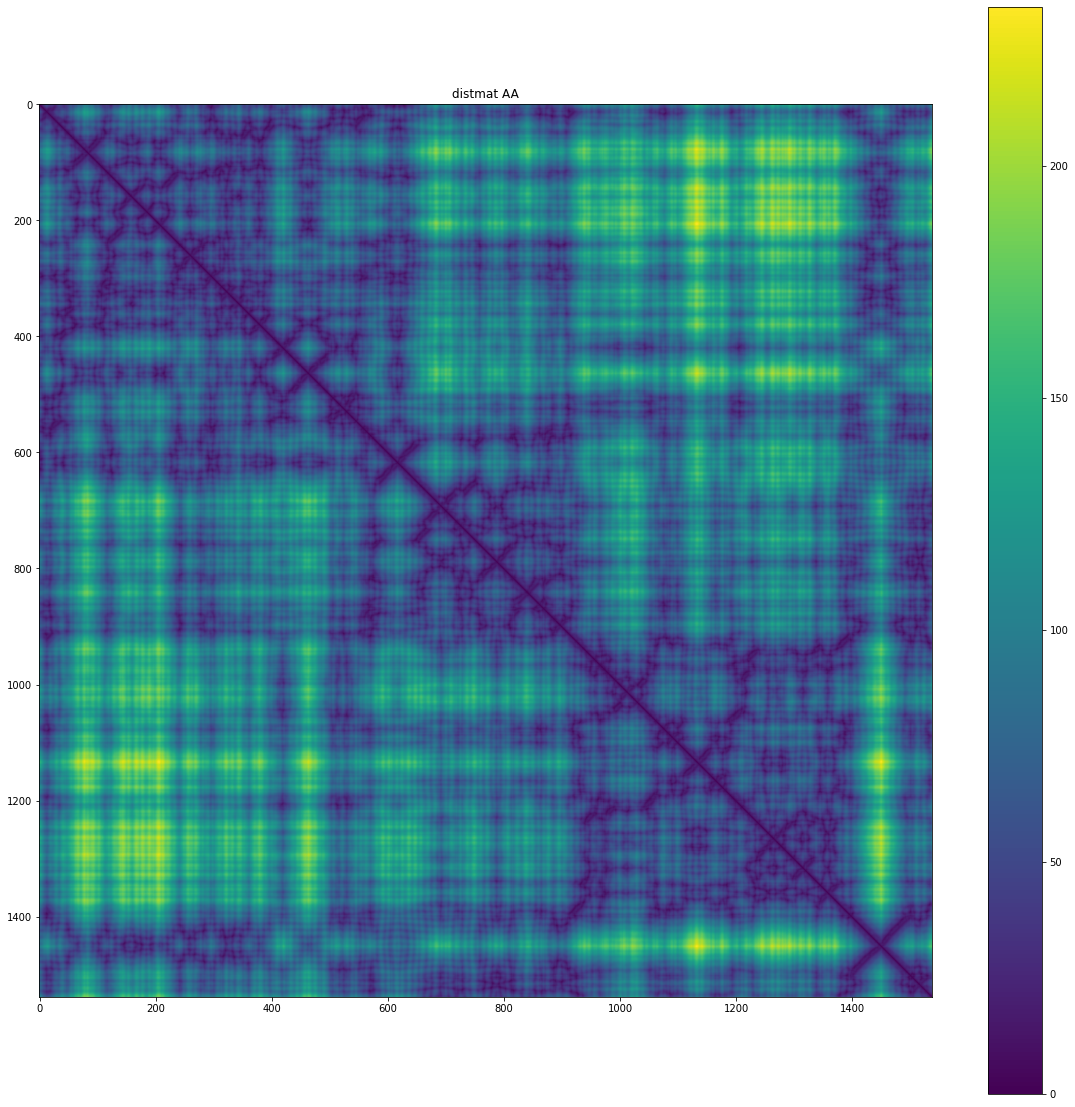

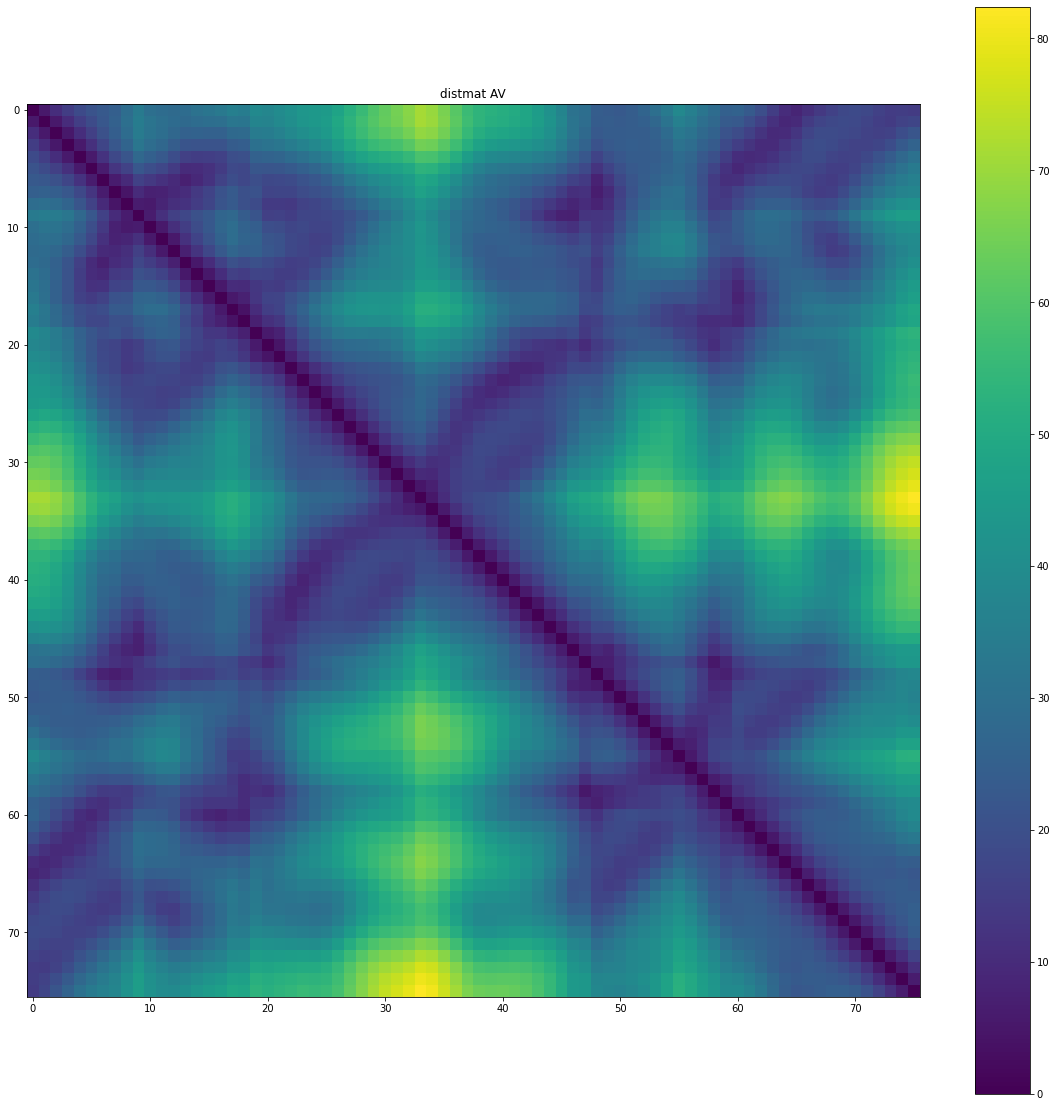

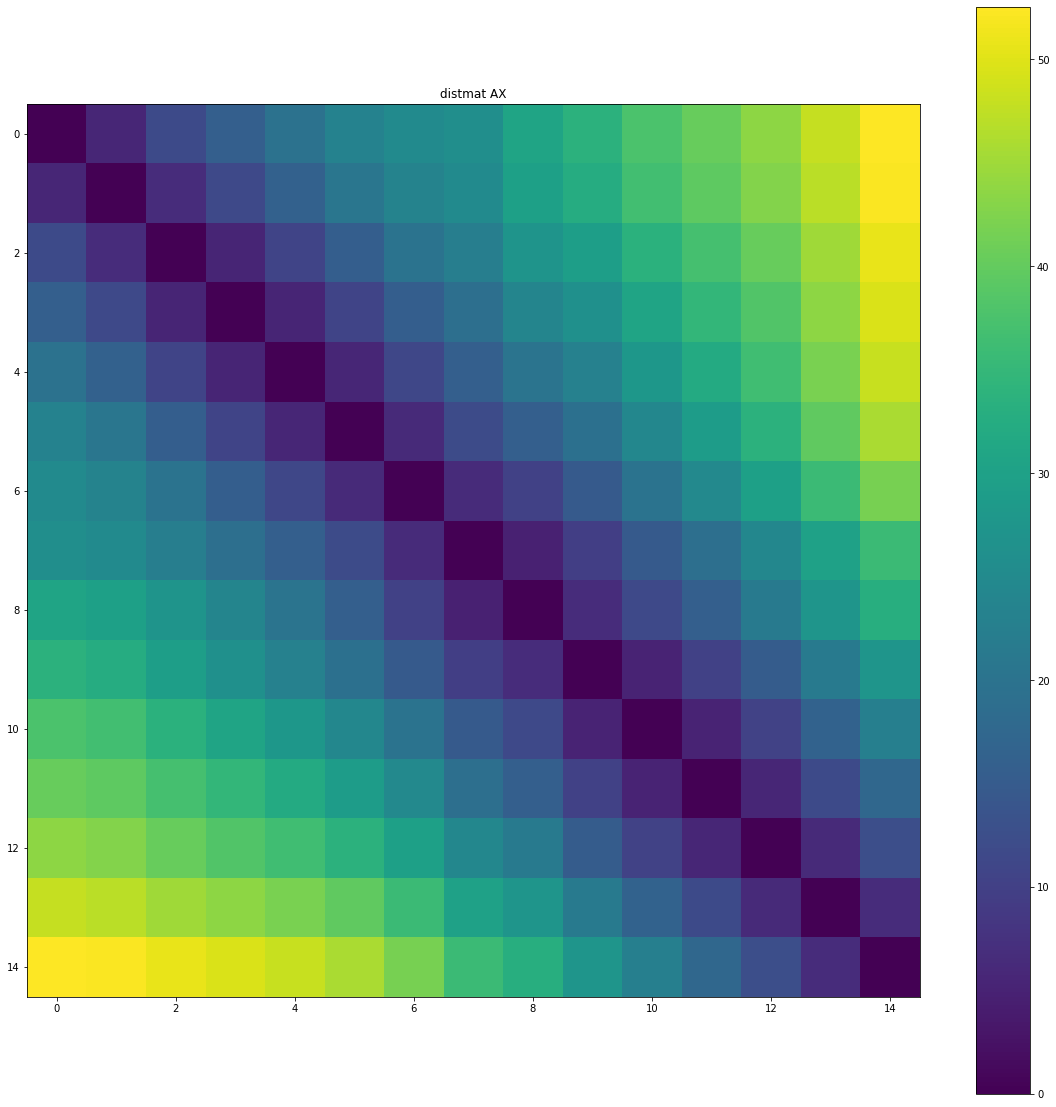

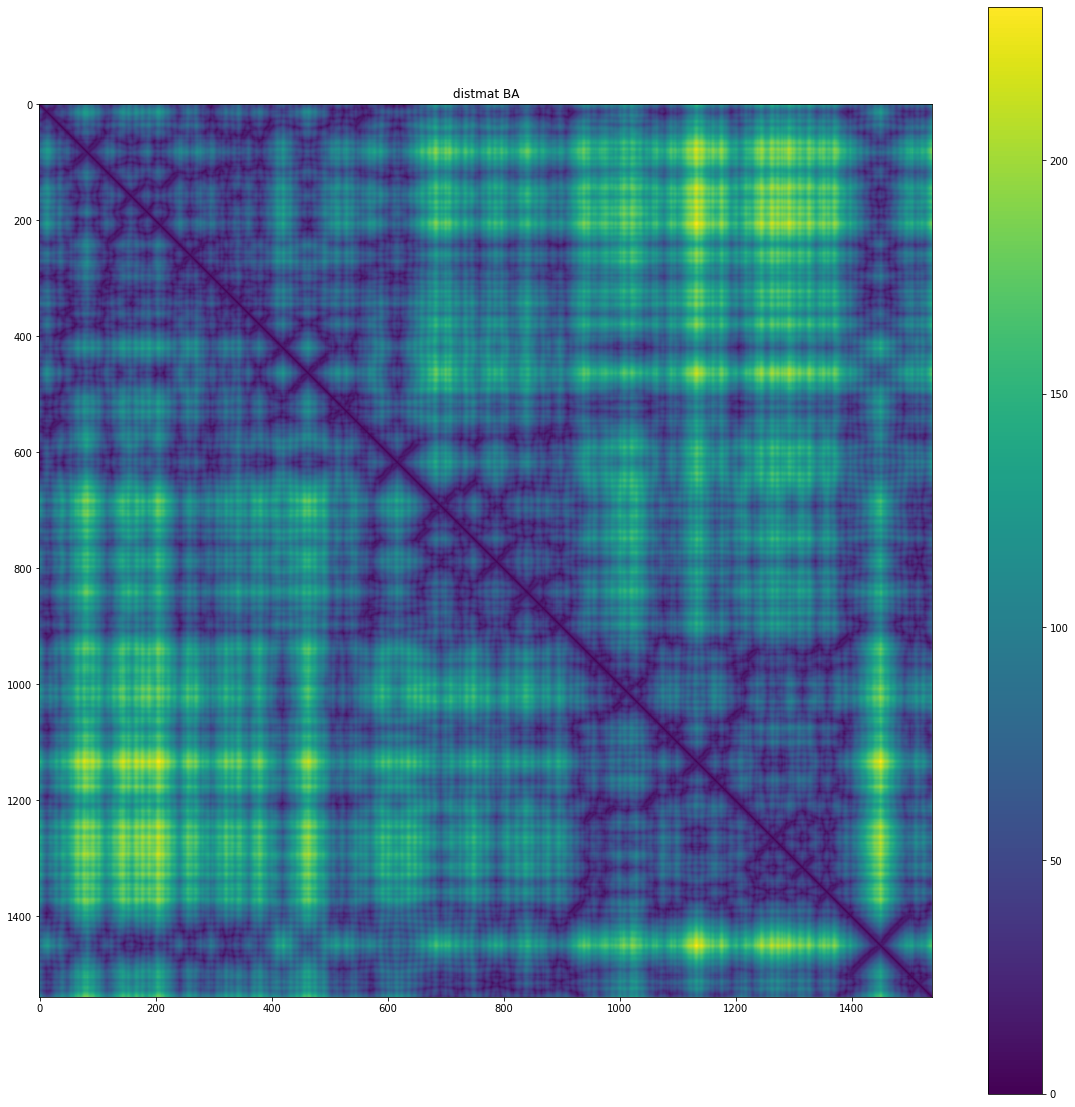

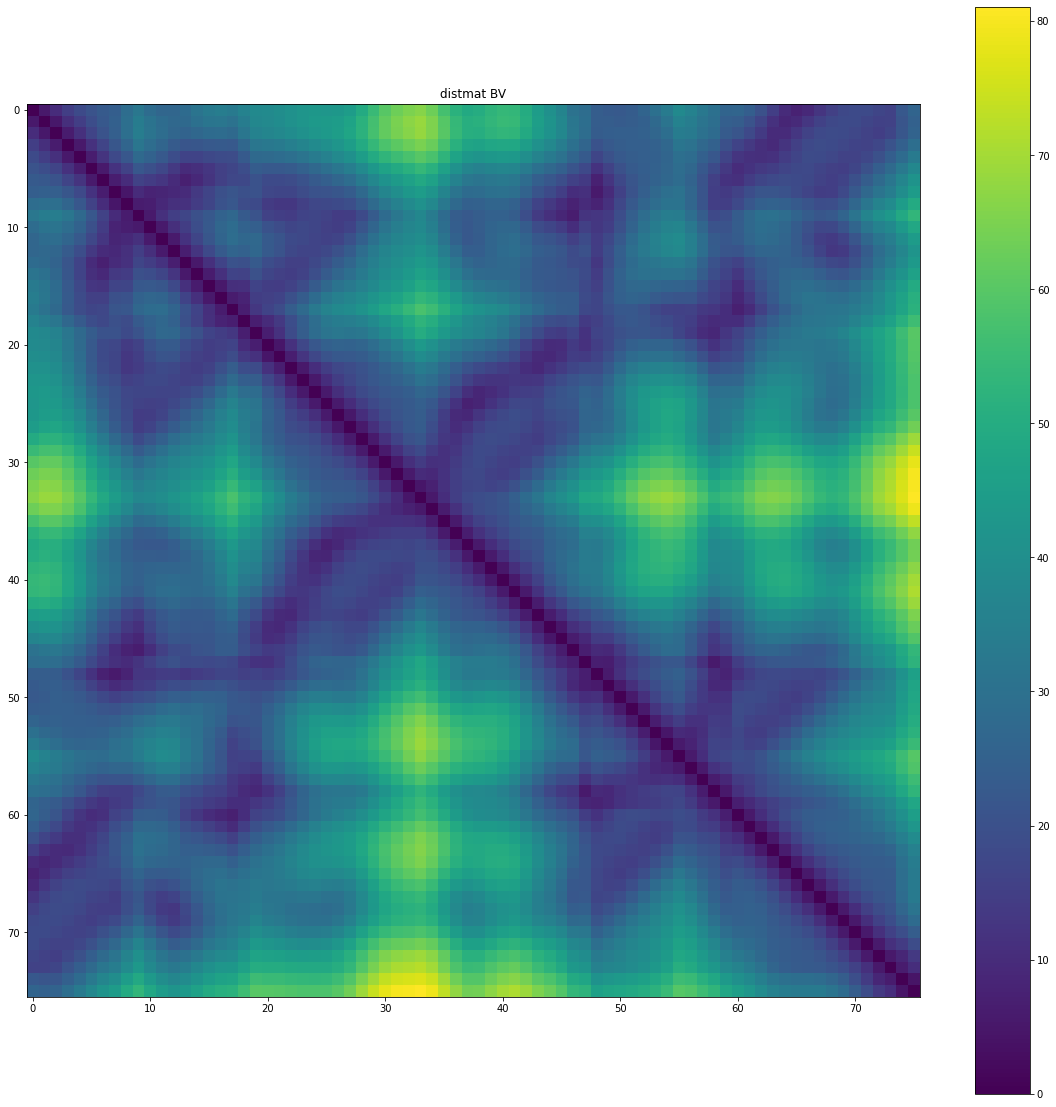

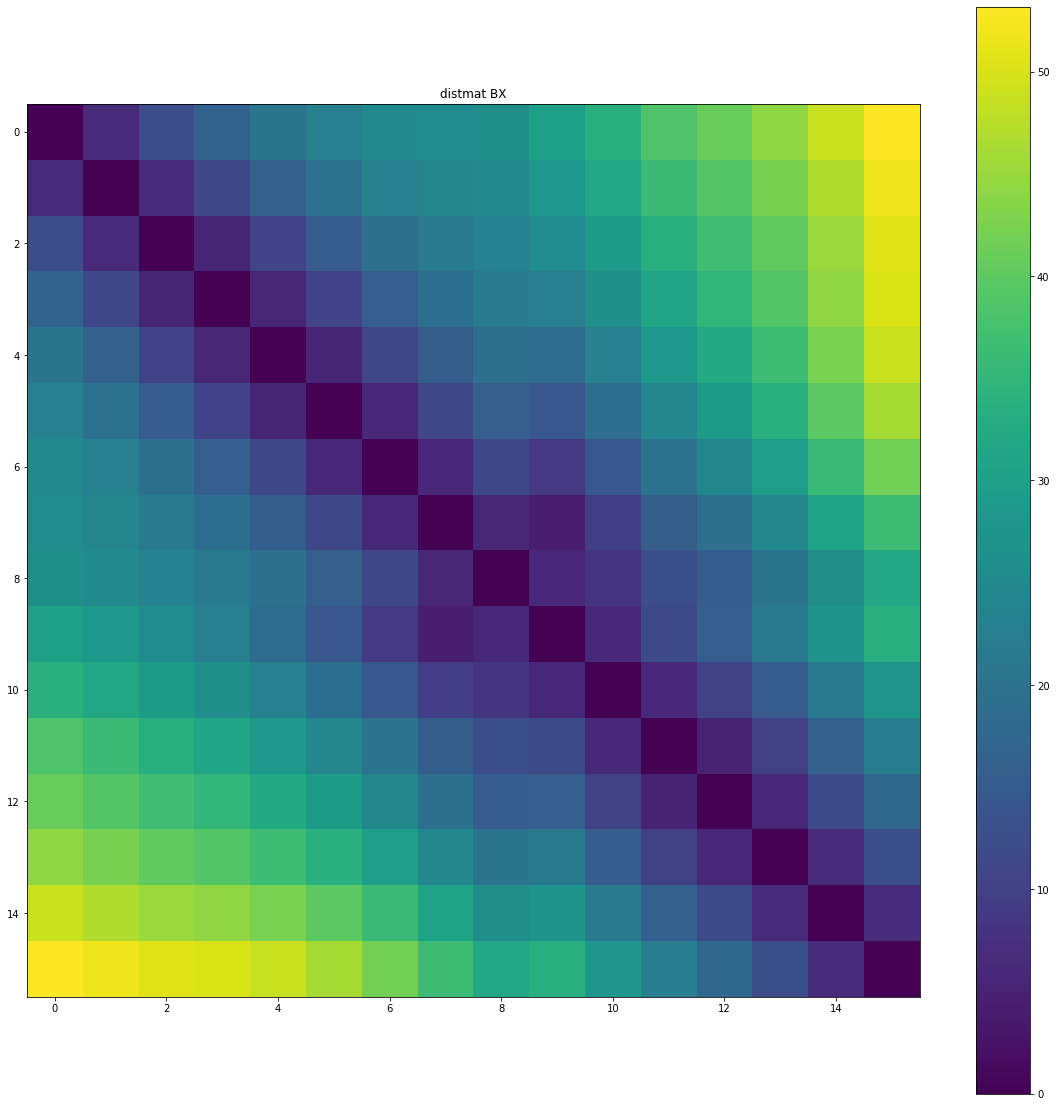

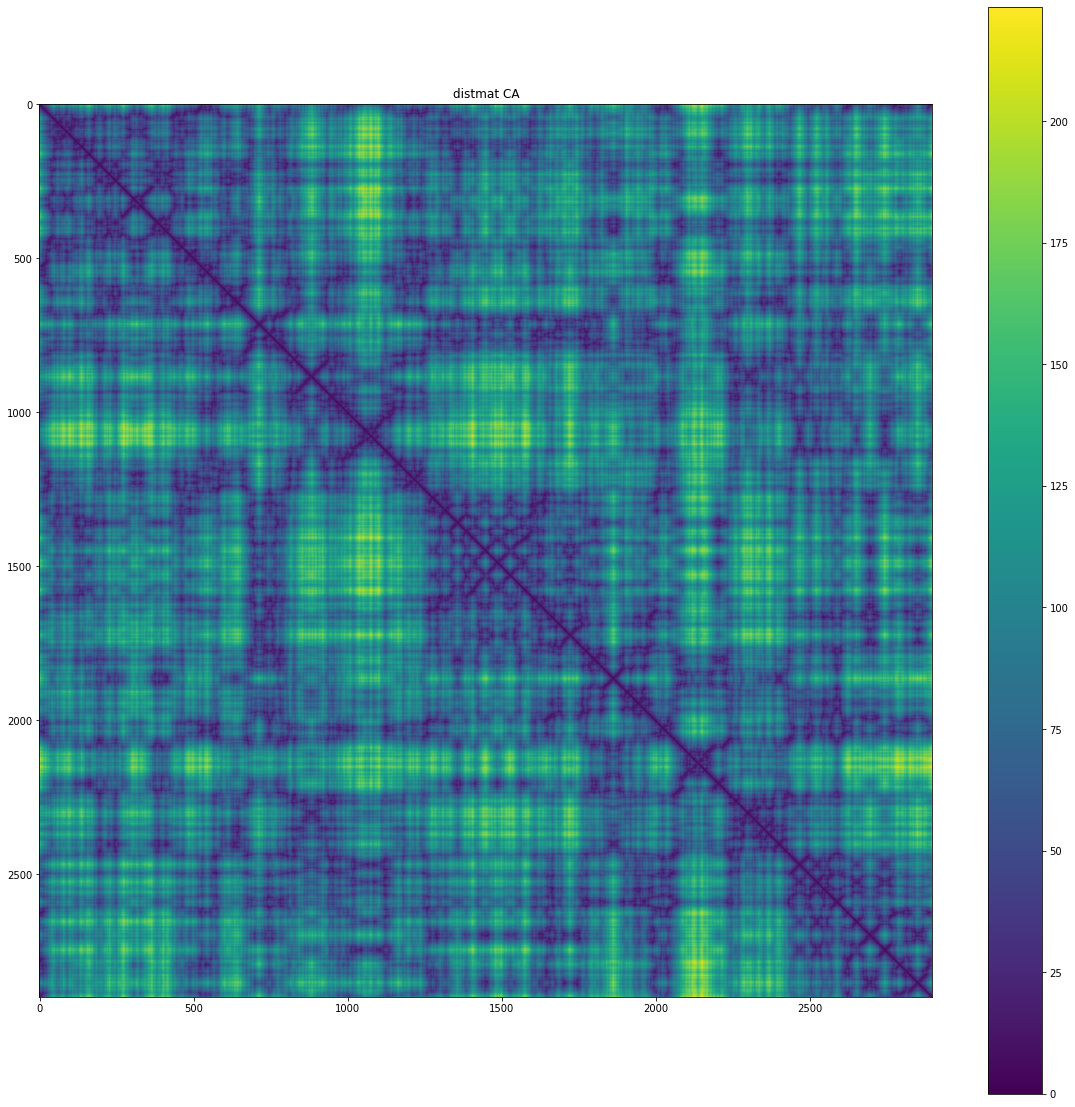

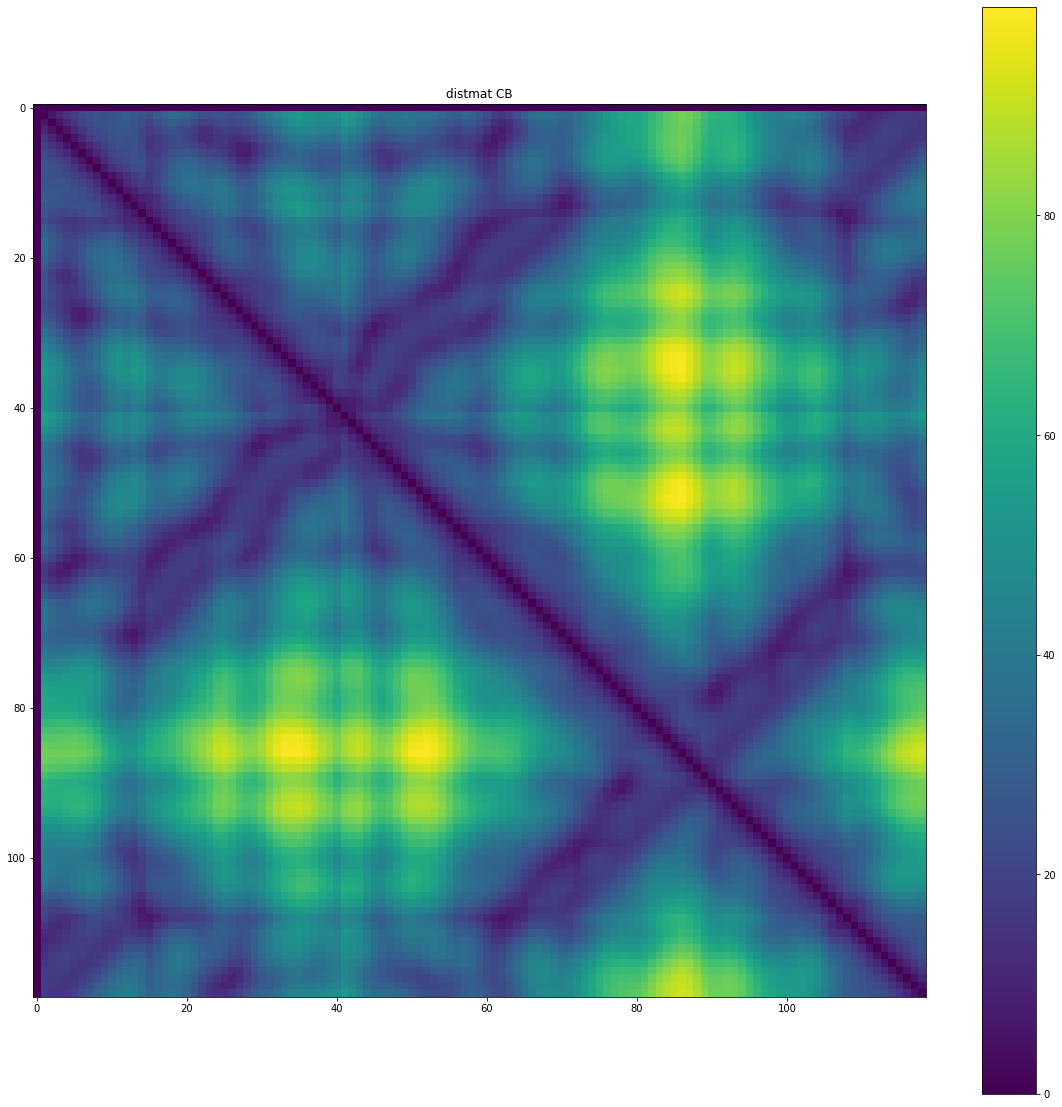

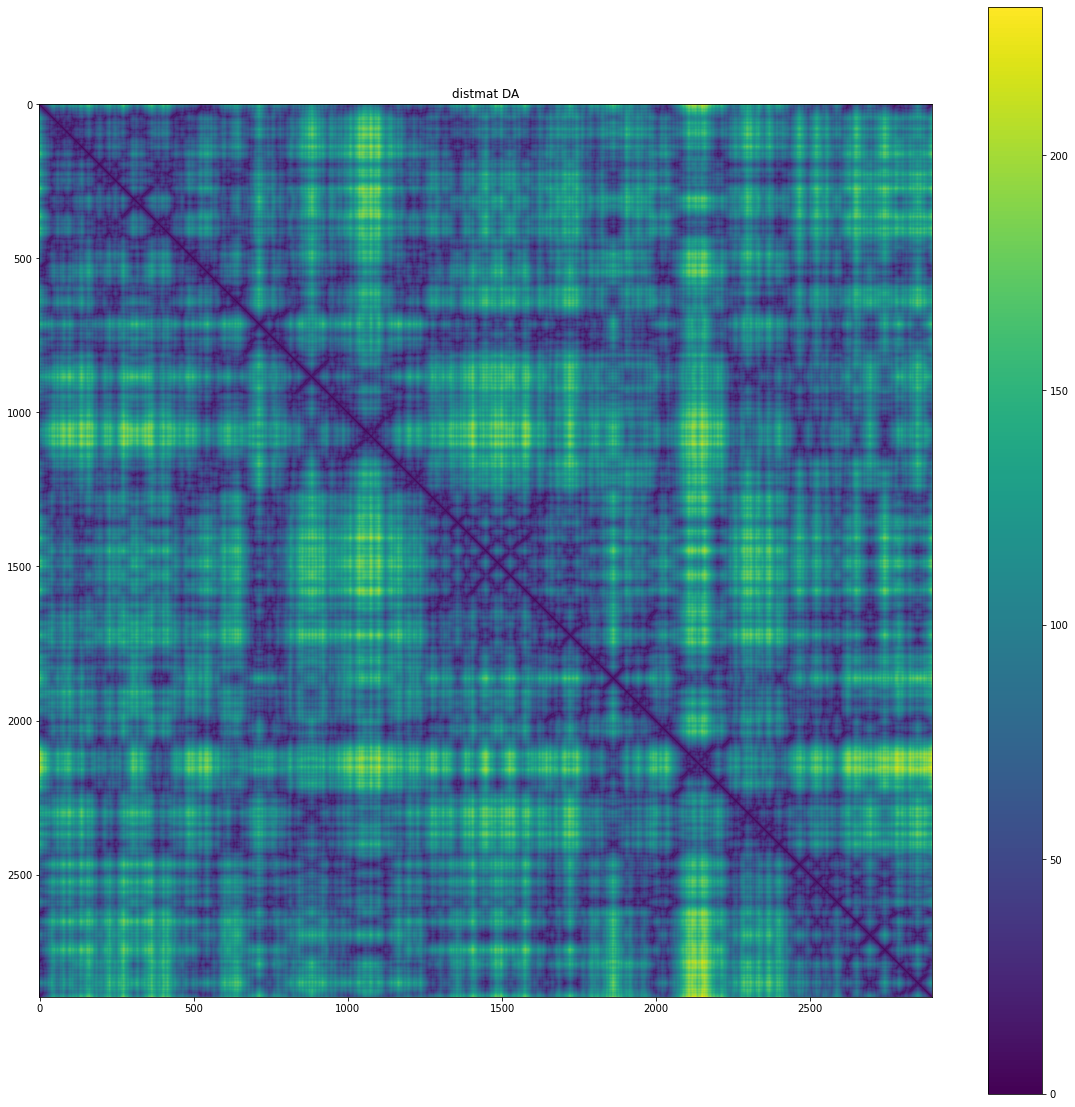

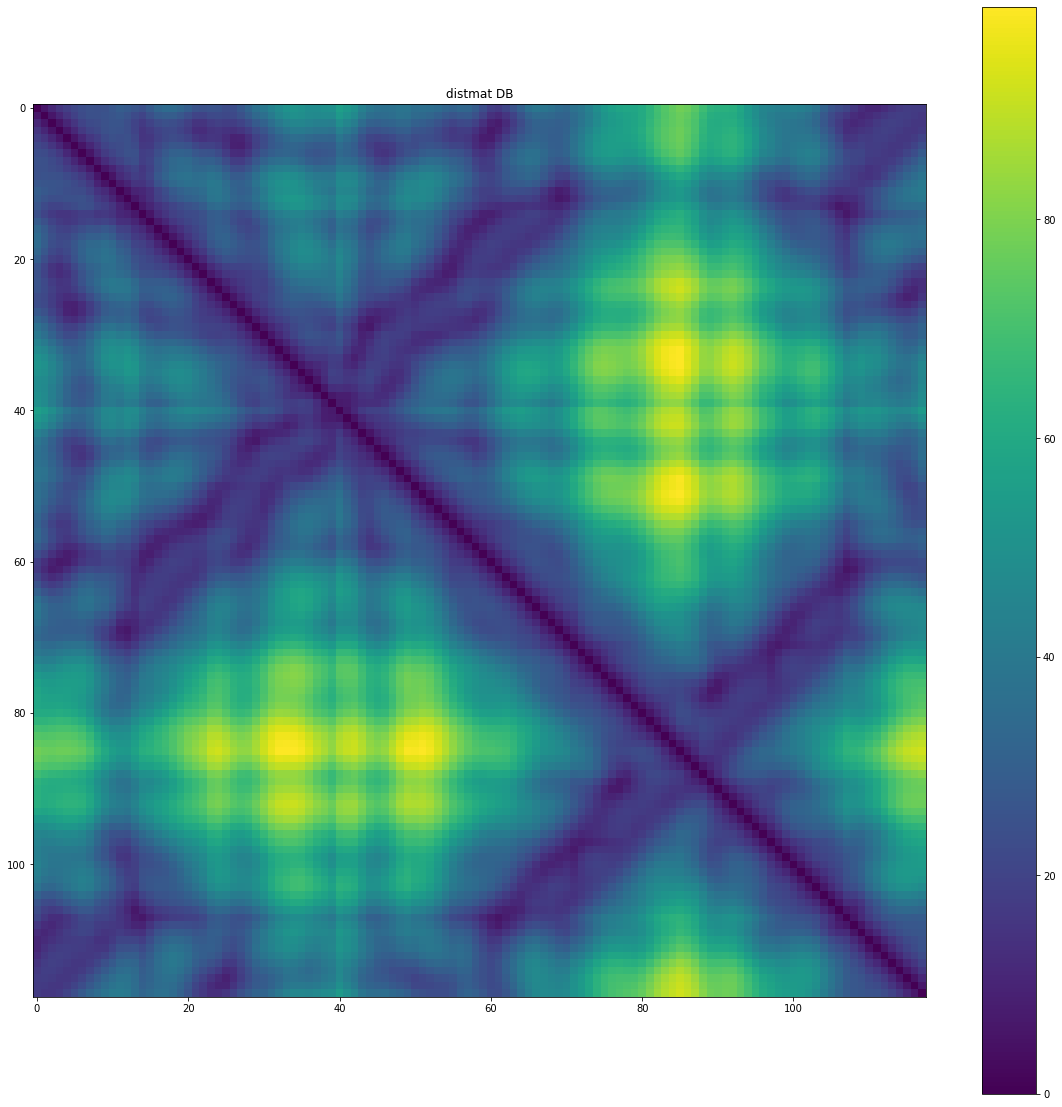

In [46]:
for i,chain in enumerate(distmats):
    if distmats[chain].shape[0]>0:
        plt.figure(figsize= (20,20))
        plt.title( 'distmat ' + chain )

        plt.imshow(distmats[chain])
        plt.colorbar()
        plt.show()


In [63]:
import copy
subunit = distmats['BA']
print(subunit)
subthresh = copy.deepcopy(subunit)
subthresh[ subthresh < 25 ] = 1 
subthresh[ subthresh > 25 ] = 0 
np.fill_diagonal(subthresh , 0)
print(subthresh)

[[  0.           5.59755421  10.90877533 ... 102.96587372 104.5848465
  105.31445312]
 [  5.59755421   0.           5.91174793 ...  99.24987793 100.99783325
  101.87442017]
 [ 10.90877533   5.91174793   0.         ...  97.03430939  98.75437164
   99.62504578]
 ...
 [102.96587372  99.24987793  97.03430939 ...   0.           5.60213661
   11.0241003 ]
 [104.5848465  100.99783325  98.75437164 ...   5.60213661   0.
    5.48589087]
 [105.31445312 101.87442017  99.62504578 ...  11.0241003    5.48589087
    0.        ]]
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [64]:
from sklearn.manifold import Isomap , MDS , locally_linear_embedding
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans , DBSCAN ,SpectralClustering ,OPTICS , AgglomerativeClustering
import sklearn

In [85]:
def return_clustering(codonmat, calc_isomap = False , scale = True , dbscan = False , xi = 0.035 , samples = 5 , jaccard = True):
    if scale == True:
        scaler = sklearn.preprocessing.RobustScaler( )
        codonmat = scaler.fit_transform(codonmat.T).T
    if calc_isomap == True:
        try:
            isomap = Isomap( n_neighbors= 25, n_components= 50 , eigen_solver='auto', tol=0, 
               max_iter=None, path_method='auto', neighbors_algorithm='auto', n_jobs=-1 )
            #isomap = sklearn.manifold.locally_linear_embedding(n_neighbors=25, n_components=50)
            codonmat = isomap.fit_transform( X=codonmat.T ).T
        except:
            pass
    
    if jaccard == False:
        apb = OPTICS(min_samples=samples, metric='minkowski', p=1.5, metric_params=None, cluster_method='xi', eps=None, xi=xi, predecessor_correction=True, min_cluster_size=2 , algorithm='auto', leaf_size=20, n_jobs=-1)
        cluster_labels_codon = apb.fit_predict(codonmat.T )
    
    else:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            apb = OPTICS(min_samples=samples, metric='jaccard', p=1.5, metric_params=None, cluster_method='xi', eps=None, xi=xi, predecessor_correction=True, min_cluster_size=2 , algorithm='auto', leaf_size=20, n_jobs=-1)
            cluster_labels_codon = apb.fit_predict(codonmat.T )
    
    return cluster_labels_codon

def subcluster( mat , cluster_thresh=15 , indices = None  ,  iter_thresh = 5 , clusterlevel = 'head' , clustiter =0, calc_isomap = False , scale = True , xi = .035 , samples = 5 , verbose = False , jaccard = False  ):
    #break a large cluster into smaller subclusters until avg cluster size is below thresh
    if verbose == True:
        print('clustering' , clusterlevel)
    
    cluster_labels = return_clustering(mat, calc_isomap=calc_isomap  , scale=scale  , dbscan=dbscan  ,xi = xi , samples = samples , jaccard = jaccard)
    
    if verbose == True:
        print('DONE clustering ', clusterlevel)
    if indices is None:
        indices = np.arange(mat.shape[1])
    
    l,c = np.unique(cluster_labels, return_counts= True)
    if len(l) == 1:
        xi += .01
        if verbose == True:
            print(l)
            print('xi',xi)
    if verbose == True:
        print('l',l)
        print('c',c)
    clustering = {  'labels': cluster_labels , 'sub':{} , 'mappings':{}  }
    #if we're over the max recursion
    kmeans = False
    if clustiter < iter_thresh:
        
        for i,label in enumerate(list(l)):
            clustering['mappings'][label] = indices[cluster_labels == label]
            if c[i] > cluster_thresh:
                if verbose == True:
                    print( 'reclustring',label , c[i] )
                    print( 'min samples' , samples )
                #isomap within clusters
                clustering['sub'][label] = subcluster( mat[:,cluster_labels==label] , cluster_thresh =cluster_thresh ,indices= clustering['mappings'][label] , iter_thresh = iter_thresh , clusterlevel= str(label)+'_'+str(clustiter), samples = samples,  clustiter = clustiter + 1 , calc_isomap = True , jaccard = True ,  xi= xi , scale = scale  )
                samples = max( 2 , samples-1 )
    return clustering

In [ ]:
def return_sub(indict, level= 0 ,mapping = None):
    l,c = np.unique(indict['labels'] , return_counts= True)
    for clust in list(l):
        if 'sub' not in indict or clust not in indict['sub']:
            if clust != -1:
                yield indict['mappings'][clust]  
        else:
            return_sub( indict['sub'][clust], level = level +1 )
        

In [ ]:
from sklearn.covariance import GraphicalLassoCV , ShrunkCovariance , EmpiricalCovariance

def divide_clusters( subclustering_dict , cols ):
    #only go down one level for now
    cluster_dict={}
    count =0
    total_labels = np.ones((cols,))*-1
    for mapping in return_sub(subclustering_dict):
        total_labels[mapping] = count
        count += 1
    return total_labels
    #setup sublcluster dictionary

def clusters2pairs( cluster_labels , mat , use_outliers =True,  verbose = True ):
    #subcluster further using sparse inv cov within clusters to form pairs
    count = 0
    l,c = np.unique(cluster_labels, return_counts= True)
    print(l)
    print(c)
    print(mat.shape)
    pairs = []
    for label in l:
        print(label)
        if label != -1 or use_outliers == True:
            submat = mat[:, cluster_labels == int(label)]
            
            print(submat.shape)

            #edge_model = GraphicalLassoCV(mode ='lars',max_iter = 1000)
            #edge_model = EmpiricalCovariance()
            #edge_model = ShrunkCovariance()
            
            submat /= submat.std(axis=0)
            
            edge_model.fit(submat)
            partial_correlations = edge_model.precision_.copy()
            
            if verbose == True:
                
                plt.imshow(edge_model.covariance_)
                plt.colorbar()
                plt.show()

                plt.imshow(partial_correlations)
                plt.colorbar()
                plt.show()
            print(partial_correlations)
            d = 1 / np.sqrt(np.diag(partial_correlations))
            partial_correlations *= d
            partial_correlations *= d[:, np.newaxis]
                
            non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)
            if verbose == True:
                print(non_zero)
            #extract pairs

In [83]:
def check_point(contactsx , contactsy, ptx,pty, radius = 10 , verbose = False):
    #find non zero contact pts
    for center_x, center_y, in zip(contactsx,contactsy):
        if (ptx - center_x)**2 + (pty - center_y)**2 < radius**2:
            if verbose == True:
                print(ptx,pty,center_x, center_y)
                print('left', (ptx - center_x)**2 + (pty - center_y)**2 )
                print( 'right', radius**2 )
                
            return True
    return False


In [ ]:
import scipy
#
contactsx , contactsy  = (np.nonzero(subthresh)[0] ,np.nonzero(subthresh)[1])

#multiply connectivity mat to get 1 degree of separation 

connected = np.dot(subthresh,subthresh)
connnectedx , connectedy  = (np.nonzero(connected)[0] ,np.nonzero(connected)[1])
blurfactor =  .25

plt.figure(figsize=(10,10) )
plt.title('contact mat')
plt.scatter( np.nonzero(subthresh)[0] ,np.nonzero(subthresh)[1]  , marker= 'o' , alpha = .002525,  s = 50)
plt.show()

plt.figure(figsize=(10,10) )
plt.title('contact 1 degree of sep')
plt.scatter(connnectedx ,connectedy  , marker= 'o' , alpha = .002525,  s = 50)
plt.show()


for bluriter in [0,1,2,3,4,5,10,20]:
    #bluriter
    #do all vs all 
        #blur w connectivity mat
    coevmat = copy.deepcopy(globalmat)
    
    for k in range( bluriter):
        print('blurring x' , k)
        coevmat += np.dot(blurfactor*connectmat, coevmat )
    greens = []
    reds=[]
    oranges=[]
    dist = scipy.spatial.distance.pdist(coevmat.T)
    print(dist.shape)
    
    plt.hist(dist)
    plt.show()
    hist,edges = np.histogram( dist , bins=10)
    print(edges)
    
    plt.figure(figsize=(10,10) )

    dist =  scipy.spatial.distance.squareform(dist)
    sns.heatmap(dist)
    plt.show()
    
    
    for thresh in list(edges)[:-1]:
        
        print(thresh)
        threshmat = copy.deepcopy(dist)
        threshmat[dist>thresh] = 0
        threshmat[dist <= thresh] = 1
        threshmat = threshmat[non_gap,:]
        threshmat = threshmat[:,non_gap]
        np.fill_diagonal(threshmat, 0)
        
        print('infered interactors ' , np.sum(threshmat) / 2 )
        sns.heatmap(threshmat)
        plt.title('thresh:'+str(thresh))
        plt.show()
        '''       
        #check for contact pts
        ptsx,ptsy = np.nonzero( threshmat )
        print(len(ptsx))
        print(len(ptsy))
        
        ptsx = list(ptsx)
        ptsy = list(ptsy)
        pts =  list( zip(ptsx,ptsy) )
        green = [ 1 if  ptx > pty and  check_point(list(contactsx) , list(contactsy), ptx,pty, radius = 10 , verbose = False) else 0 for ptx,pty in pts ]
        #check for connected components
        print('green pts' ,np.sum(green))
        
        orange = [1 if  ptx > pty and  check_point(list(connnectedx) , list(connectedy) ,ptx,pty, radius = 5 , verbose = False) else 0 for ptx,pty in pts  ]
        print('oragne pts ' , np.sum(orange))

        #all detected points not in orange and green
        red = np.array(green) + np.array(orange)
        red[red > 0 ] = 1
        red = np.abs(1 - red )
        print('red pts ' , np.sum(orange))
        
        
        greens.append(np.sum(green))
        oranges.append(np.sum(orange))
        reds.append(np.sum(red))
    print(greens)
    print(oranges)
    print(reds)
    plt.plot(greens,c='green')
    plt.plot(reds,c='red')
    plt.plot(oranges,c='orange')
    plt.title('bluriter '+str(bluriter) )
    plt.show()
'''


In [94]:
import itertools

connected = np.dot(subthresh,subthresh)
connnectedx , connectedy  = (np.nonzero(connected)[0] ,np.nonzero(connected)[1])

globalmat_blur_thresh = copy.deepcopy(globalmat_blur)
globalmat_blur_thresh[ globalmat_blur_thresh < 20 ] = 0

#for blur iter in blur
#count the number of green / orange / red

#for mat in [ globalmat_blur_thresh , globalmat , globalmat_thresh , globalmat_blur ]:
maxiter = 20 



blurs = []
reds =[]
oranges=[]
greens =[]

increment = 50
blurs = 0

lastreds = 100
reds = [0]

for bluriteration in range(maxiter):
    
    mat = copy.deepcopy(globalmat)
    for k in range(int( blurs ) ):
        print(np.sum(mat))
        mat += np.dot(blurfactor*connectmat, mat )
        
    print('blurs',blurs)
    if reds[-1] < lastreds:
        blurs = blurs + increment
    else:
        blurs = blurs - increment
    
    increment = increment/2
    lastreds = reds[-1]
    
    cluster_labels = divide_clusters( subcluster(mat, calc_isomap= False , scale = False )  , mat.shape[1])
    non_gap_labels = cluster_labels[non_gap]
    l,c = np.unique(cluster_labels, return_counts= True)
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for k in range(len(l))   ]
    plt.figure(figsize=(45,100))

    for i,label in enumerate(list(l.flat)):
        mask = copy.deepcopy(globalmat)
        mask[:, label!=cluster_labels ] =0
        plt.spy(mask, markersize= .5 ,c=color[i] )
    plt.show()

    plt.figure(figsize=(20,20) )
    for i,label in enumerate(list(l.flat)):
        if c[i]< 10 and c[i]>2:        
            zeroed = np.where(non_gap_labels == label )[0]
            if len(list(zeroed))>2:
                combos = list(zip( * [ c for c in itertools.combinations(list(zeroed) , 2)]))
                try:
                    plt.scatter( combos[0] , combos[1] , c= color[i] , marker= 'X', s=100)
                    plt.scatter( combos[1], combos[0] , c= color[i] , marker= 'X' , s=100)
                except:
                    pass

    plt.scatter( np.nonzero(subthresh)[0] ,np.nonzero(subthresh)[1]  , marker= 'o' , alpha = .002525,  s = 100)
    plt.show()
    plt.figure(figsize=(20,20) )
    #red and green plt
    for i,label in enumerate(list(l.flat)):
        if c[i]< 15 and c[i]>2:       
            mask = copy.deepcopy(subthresh)
            zeroed = np.where(non_gap_labels == label )[0]
            if len(list(zeroed))>2:
                pts = [ (ptx,pty) for ptx,pty in itertools.combinations(list(zeroed) , 2 ) if ptx < subthresh.shape[1] and pty <  subthresh.shape[1] ]
                green = np.array([ check_point(list(np.nonzero(subthresh)[0]) , list(np.nonzero(subthresh)[1]), ptx , pty,radius = 15 )  for ptx,pty in  pts ])
                orangehits = np.array([ check_point(list(connnectedx) , list(connectedy), ptx , pty,radius = 10 )  for ptx,pty in pts ])

                orangehits[ np.logical_and( green , orangehits ) ] = False

                red= copy.deepcopy(green)
                red = ~red
                red[orangehits == True] = False
                
                ones = np.ones((len(pts),))
                
                reds.append(np.sum(ones[red]))
                oranges.append(np.sum(ones[orangehits]))
                greens.append(np.sum(ones[green]))
                
                blurvec.append(blurs)
                
                pts = np.array( [[ptx,pty] for ptx,pty in  itertools.combinations(list(zeroed) ,2) ] )

                plt.scatter( pts[green,0] ,pts[green,1], c= 'green' , marker= 'X', s=100)
                plt.scatter( pts[green,1] ,pts[green,0], c= 'green' , marker= 'X', s=100)


                plt.scatter( pts[red,0] ,pts[red,1] , c= 'red' , marker= 'X' , s=100)
                plt.scatter( pts[red,1] ,pts[red,0] , c= 'red' , marker= 'X' , s=100)


                plt.scatter( pts[orangehits,1] ,pts[orangehits,0], c= 'orange' , marker= 'X', s=100)
                plt.scatter( pts[orangehits,0] ,pts[orangehits,1], c= 'orange' , marker= 'X', s=100)

    plt.scatter( np.nonzero(subthresh)[0] ,np.nonzero(subthresh)[1]  , marker= 'o' , alpha = .002525,  s = 100)
    plt.show()

KeyboardInterrupt: 

done getting global dist
1
[(285, 522), (285, 811), (285, 978), (285, 1103), (285, 1344), (522, 811), (522, 978), (522, 1103), (522, 1344), (811, 978), (811, 1103), (811, 1344), (978, 1103), (978, 1344), (1103, 1344)]


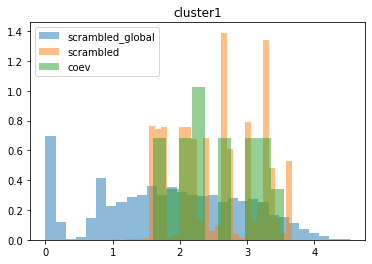

2
[(493, 885), (493, 908), (493, 918), (885, 908), (885, 918), (908, 918)]


KeyboardInterrupt: 

In [140]:
shuffle_iter = 1000
#find within cluster eval for a pair 
import random
scrambled_global =[]
for i in range(shuffle_iter *10):
    select1 = random.randint( 0 , globalmat.shape[1]-1 )
    select2 = random.randint( 0 , globalmat.shape[1]-1 )
    scrambled_global.append( np.linalg.norm(globalmat[:,select1]-globalmat[:,select2])  )

print('done getting global dist')
for i,label in enumerate(list(l.flat)):
    if i < 20:
        
        if c[i]< 20 and c[i]>2:
            print(label)
            scrambled = []
            distances = []
            zeroed = np.where(non_gap_labels == label )[0]
            if len(list(zeroed))>2:
                combos =  [ c for c in itertools.combinations(list(zeroed) , 2)]
                print(combos)
                for combo in combos:
                    #find intracluster distances 
                    c1 = copy.deepcopy(globalmat[:,combo[0]])
                    c2 = copy.deepcopy(globalmat[:,combo[1]])
                    distances.append( np.linalg.norm(c1-c2) )

                    for k in range(shuffle_iter):
                        c1_scramble = copy.copy(c1)
                        c2_scramble = copy.copy(c2)
                        np.random.shuffle(c1_scramble)
                        np.random.shuffle(c2_scramble)
                        scrambled.append( np.linalg.norm(c1_scramble-c2_scramble)  )
                scrambled = np.array(scrambled)
                distances = np.array(distances)
                
                plt.hist(scrambled_global , label = 'scrambled_global' , alpha = .5, bins = 30, density=True)
                plt.hist(scrambled , label = 'scrambled' , alpha = .5, bins = 30, density=True)
                plt.hist(distances, label = 'coev' , alpha = .5, density=True)
                plt.legend()
                plt.title('cluster'+str(label))
                plt.show()

In [ ]:
#generate plot 

In [ ]:
import networkx as nx

#thresh clusters to percentile of weights?
#intracluster link weight w1xw2 

print(weights.shape)
print(weights[cluster,:].shape)
for cluster in range( weights.shape[0]):
    if cluster % 100 == 0 :
        print(cluster)
    if cluster == 0:
        linkmat = np.outer( weights[cluster,:], weights[cluster,:] )
        print(linkmat)
    else:
        linkmat += np.outer( weights[cluster,:], weights[cluster,:] )
print(linkmat.shape)

#distribution of interresidue linkages w no thresh to provide a pvalue

#reconstruct the distmat


